<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Proyecto: Implicaciones del crecimiento económico chino en Colombia: Construcción de un CLI bajo propuesta OCDE

El problema a abordar en el proyecto se basa en la construcción de un indicador de seguimiento a la actividad económica de Colombia con el fin de complementar el trabajo iniciado por la OCDE (Organización para la Cooperación y Desarrollo Económico) en la construcción de un indicador adelantado compuesto (En adelante CLI por sus siglas en inglés) para la economía de varios de sus países miembros. Dicho indicador está diseñado con el fin de proveer señales tempranas ante puntos de inflexión en los ciclos de negocios o fluctuaciones de la actividad económica alrededor de su nivel potencial de largo plazo .

Así las cosas, se usará la metodología de componentes principales para construir un CLI para Colombia a partir de 30 variables relevantes según la literatura económica: 
 - El área aprobada para construcción de edificaciones. 
 - El número de licencias otorgadas según el área aprobada. 
 - El índice de precios al consumidor (IPC).
 - Las importaciones CIF en millones dólares.
 - El índice de confianza del consumidor (ICC).
 - El índice de expectativas del consumidor (IEC). 
 - Las Exportaciones en millones de dólares.
 - Balanza comercial de bienes en millones dólares.
 - Tipo de Brent en Dólares por barril.
 - El índice del dolar (DXY).
 - Tasa de cambio del dólar en pesos colombianos USDCOP.
 - US10Y Tesoro a 10 años en porcentaje.
 - US2Y Tesoro a 2 años en porcentaje.
 - US5Y Tesoro a 5 años en porcentaje.
 - TES 10Y Títulos de Tesorería en porcentaje.
 - CDS 5Y Credit Default Swaps a 5 indice. 
 - Banrep vs. Fed en puntos porcentuales.
 - Tasa de cambio del dólar en Euros EURUSD.
 - Tasa de cambio del dólar en Yenes USDJPY.
 - Tasa de cambio del dólar en Libras GBPUSD.
 - Tasa de cambio del dólar en Dólares Canadienses USDCAD.
 - Tasa de cambio del dólar en Coronas USDSEK.
 - Tasa de cambio del dólar en Francos USDCHF.
 - Remesas en millones de dólares.
 - Onzas de Oro por dólar.
 - Kilovatios de Gas por hora.
 - Valor de libra del café en dólares.
 - Inversión extranjera directa en millones de dólares.
 - Inversión extranjera de portafolio de dólares. 

 Una vez construido el índice a través de los componentes principales, se realizarán ejercicios de elasticidad entre el CLI de China -construido previamente por la OCDE- y el CLI colombiano aportado en este proyecto, con el fin de cuantificar el efecto que tiene sobre la actividad económica de Colombia una rebaja de 1 punto porcentual en el crecimiento económico esperado de China para 2023.


In [2]:
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargamos y visualizamos la primeras observaciones de los datos
X = pd.read_excel('BDD_.xlsx', sheet_name='X')

X = X.set_index("Fecha")
X.head()


Área aprobada  Número de licencias    IPC  Importaciones    ICC  \
Fecha                                                                         
2005-01-01         990141                 1575  56.45    1464.053235  19.27   
2005-02-01        1094253                 1858  57.02    1464.504259  13.92   
2005-03-01        1178351                 1894  57.46    1631.174177   9.60   
2005-04-01         983506                 2062  57.72    1839.779975  13.34   
2005-05-01        1111891                 1920  57.95    1754.662179  14.05   

                  IEC  Exportaciones  Balanza comercial de bienes  \
Fecha                                                               
2005-01-01  26.603333    1378.979800                   860.759800   
2005-02-01  18.856667    1529.264780                  1015.839780   
2005-03-01  12.826667    1722.080963                  1189.551963   
2005-04-01  16.896667    1682.450456                  1152.643290   
2005-05-01  14.736667    1737.197678                  1206.496646   

            Producción diaria petróleo  Brent  ...  GBPUSD  USDCAD  USDSEK  \
Fecha                                          ...                           
2005-01-01                  518.220000  45.92  ...  1.8833  1.2403  6.9887   
2005-02-01                  513.425000  50.06  ...  1.9219  1.2331  6.8444   
2005-03-01                  532.529000  54.29  ...  1.8895  1.2091  7.0656   
2005-04-01                  529.807167  51.09  ...  1.9077  1.2589  7.1305   
2005-05-01                  530.701032  50.73  ...  1.8175  1.2540  7.4398   

            USDCHF     Remesas         Oro       Gas        Café  \
Fecha                                                              
2005-01-01  1.1888  224.229432  424.090476  6.196190  101.457143   
2005-02-01  1.1610  235.909741  424.165000  6.188350  114.057500   
2005-03-01  1.1961  270.986652  434.531818  7.045455  127.829545   
2005-04-01  1.1949  261.690367  429.714286  7.150524  120.814286   
2005-05-01  1.2474  270.060388  422.181818  6.480864  119.625000   

            Inversión Entranjera Directa  Inversión Extranjera de Portafolio  
Fecha                                                                         
2005-01-01                    158.682210                          -17.525711  
2005-02-01                    215.878840                           -1.846219  
2005-03-01                    172.185678                          -22.167737  
2005-04-01                    690.612882                          -25.790365  
2005-05-01                    175.240915                          -15.219145  

[5 rows x 30 columns]

Para este primer paso, llamamos el archivo "BDD", el cual contiene la base de datos con las variables implicadas en el ejercicio, a saber:

 - El área aprobada para construcción de edificaciones 
 - El número de licencias otorgadas según el área aprobada 
 - El índice de precios al consumidor (IPC)
 - Las importaciones CIF en dólares
 - El índice de confianza del consumidor (ICC)
 - El índice de expectativas del consumidor (IEC).  
 - Las Exportaciones en millones de dólares.
 - Balanza comercial de bienes en millones dólares.
 - Tipo de Brent en Dólares por barril.
 - El índice del dolar (DXY).
 - Tasa de cambio del dólar en pesos colombianos USDCOP.
 - US10Y Tesoro a 10 años en porcentaje.
 - US2Y Tesoro a 2 años en porcentaje.
 - US5Y Tesoro a 5 años en porcentaje.
 - TES 10Y Títulos de Tesorería en porcentaje.
 - CDS 5Y Credit Default Swaps a 5 indice. 
 - Banrep vs. Fed en puntos porcentuales.
 - Tasa de cambio del dólar en Euros EURUSD.
 - Tasa de cambio del dólar en Yenes USDJPY.
 - Tasa de cambio del dólar en Libras GBPUSD.
 - Tasa de cambio del dólar en Dólares Canadienses USDCAD.
 - Tasa de cambio del dólar en Coronas USDSEK.
 - Tasa de cambio del dólar en Francos USDCHF.
 - Remesas en millones de dólares.
 - Onzas de Oro por dólar.
 - Kilovatios de Gas por hora.
 - Valor de libra del café en dólares.
 - Inversión extranjera directa en millones de dólares.
 - Inversión extranjera de portafolio de dólares. 

Declaramos la variable Fecha como el índice de nuestro dataframe.

### Análisis descriptivo de los datos
El análisis descriptivo de los datos es un componente crucial de cualquier análisis de datos. Antes de poder realizar inferencias o predicciones basadas en nuestros datos, necesitamos entender las características básicas de los mismos y como puede esta afectar los resultados de análisis posteriores. Esto incluye entender la variación y distribución de los datos, la presencia de valores atípicos, entre otros.

los análisis descriptivos permiten: 

- Realizar resumenes de las variables de forma concisa y comprensible para dar contexto y ahorrar tiempos en los análisis posteriores.
- Identificar patrones, tendencias y correlaciones, que ayudan con la detección temprana de problemas y formulaciones de hipótesis de análisis.  

En particular, para el Análisis de Componentes Principales (PCA) nos permite intuir de manera temprana si la alta correlación entre variables es señal de que la información recogida en ellas se puede sintetizar en un único componente, lo cual nos ayuda a reducir la dimensión de nuestra información y con ello, modelar de manera más eficiente nuestros datos. 

Las estadísticas descriptivas nos proporcionan esta información. Algunas de las estadísticas descriptivas que evalumos incluyen la media, la mediana, el rango, la desviación estándar y los percentiles. Además, las visualizaciones de datos, como los histogramas, diagramas de cajas y correlogramas,  pueden proporcionar información valiosa sobre la distribución y las relaciones subyacentes en los datos.

* ### Analizando nuestra base de datos

In [3]:
X.shape

(222, 30)

Encontramos que la dimensión de la matriz a analizar es de 222 filas (registros) para 30 columnas (variables). Así que con ese número de variables se deberían examinar aproximadamente: 


\begin{align}
\frac{K(K-1)}{2}
\end{align}

Donde K = 30, entonces:

\begin{align}
\frac{30(30-1)}{2} = {435} \ \text{gráficas de dispersion.}
\end{align}

In [4]:
pd.options.display.float_format = '{:.4f}'.format
round(X.describe().T,4)

count         mean         std  \
Área aprobada                      222.0000 1578653.2793 447193.1614   
Número de licencias                222.0000    2094.6622    282.8645   
IPC                                222.0000      85.5599     18.9017   
Importaciones                      222.0000    4020.8361   1220.7077   
ICC                                222.0000       6.6478     19.2101   
IEC                                222.0000      11.1599     16.9149   
Exportaciones                      222.0000    3412.2629   1040.5258   
Balanza comercial de bienes        222.0000    -248.2623    861.6935   
Producción diaria petróleo         222.0000     791.0682    160.4715   
Brent                              222.0000      76.4984     24.4896   
DXY                                222.0000      88.5713      9.0341   
USDCOP                             222.0000    2674.0439    819.5914   
US10Y                              222.0000       2.7686      1.0985   
US2Y                               222.0000       1.6933      1.5534   
US5Y                               222.0000       2.2106      1.2703   
TES 10Y                            222.0000       8.1191      2.0624   
CDS 5Y                             222.0000     140.8189     27.9422   
Banrep vs. Fed                     222.0000       3.9999      1.9166   
EURUSD                             222.0000       1.2416      0.1313   
USDJPY                             222.0000     106.4820     14.7443   
GBPUSD                             222.0000       1.5324      0.2359   
USDCAD                             222.0000       1.1826      0.1322   
USDSEK                             222.0000       7.9194      1.2391   
USDCHF                             222.0000       1.0113      0.1159   
Remesas                            222.0000     452.3583    159.8640   
Oro                                222.0000    1264.5985    413.5310   
Gas                                222.0000       4.4792      2.3586   
Café                               222.0000     145.1001     43.3399   
Inversión Entranjera Directa       222.0000     833.1828    391.2064   
Inversión Extranjera de Portafolio 222.0000     146.1783    486.4952   

                                           min          25%          50%  \
Área aprobada                      272453.0000 1298584.7500 1527338.0000   
Número de licencias                   320.0000    1935.0000    2103.0000   
IPC                                    56.4500      71.3275      80.9550   
Importaciones                        1464.0532    3131.5435    4063.0765   
ICC                                   -41.3000      -9.9500       9.7000   
IEC                                   -28.3000      -4.1500      13.8367   
Exportaciones                        1378.9798    2679.6000    3267.9609   
Balanza comercial de bienes         -2361.6631    -888.7328    -361.8948   
Producción diaria petróleo            509.0710     671.2185     822.2575   
Brent                                  22.7400      57.4350      71.5800   
DXY                                    71.8020      80.7025      89.0350   
USDCOP                               1746.7000    1935.6625    2381.7500   
US10Y                                   0.5360       1.9218       2.6250   
US2Y                                    0.1188       0.4139       0.9590   
US5Y                                    0.2668       1.3450       1.8297   
TES 10Y                                 4.8498       6.6693       7.4813   
CDS 5Y                                 61.9579     121.0175     139.3500   
Banrep vs. Fed                          1.0293       2.5830       3.6351   
EURUSD                                  0.9799       1.1231       1.2268   
USDJPY                                 76.1900      98.3725     108.5550   
GBPUSD                                  1.1160       1.3234       1.5315   
USDCAD                                  0.9436       1.0554       1.2144   
USDSEK                                  5.9421       6.82


Evidenciamos que las estadísticas descriptivas de cada una de las variables muestran que: 
- No tenemos datos faltantes, lo cual ayuda para el desarrollo de futuros análisis. 
- las medidas de tendencia central muestran dispersión entre los datos debido a grandes desvisiones estándar que harán difícil la maximización de la varianza al momento de realizar análisis de componentes principales. En un paso posterior en este notebook estandarizaremos las variables.

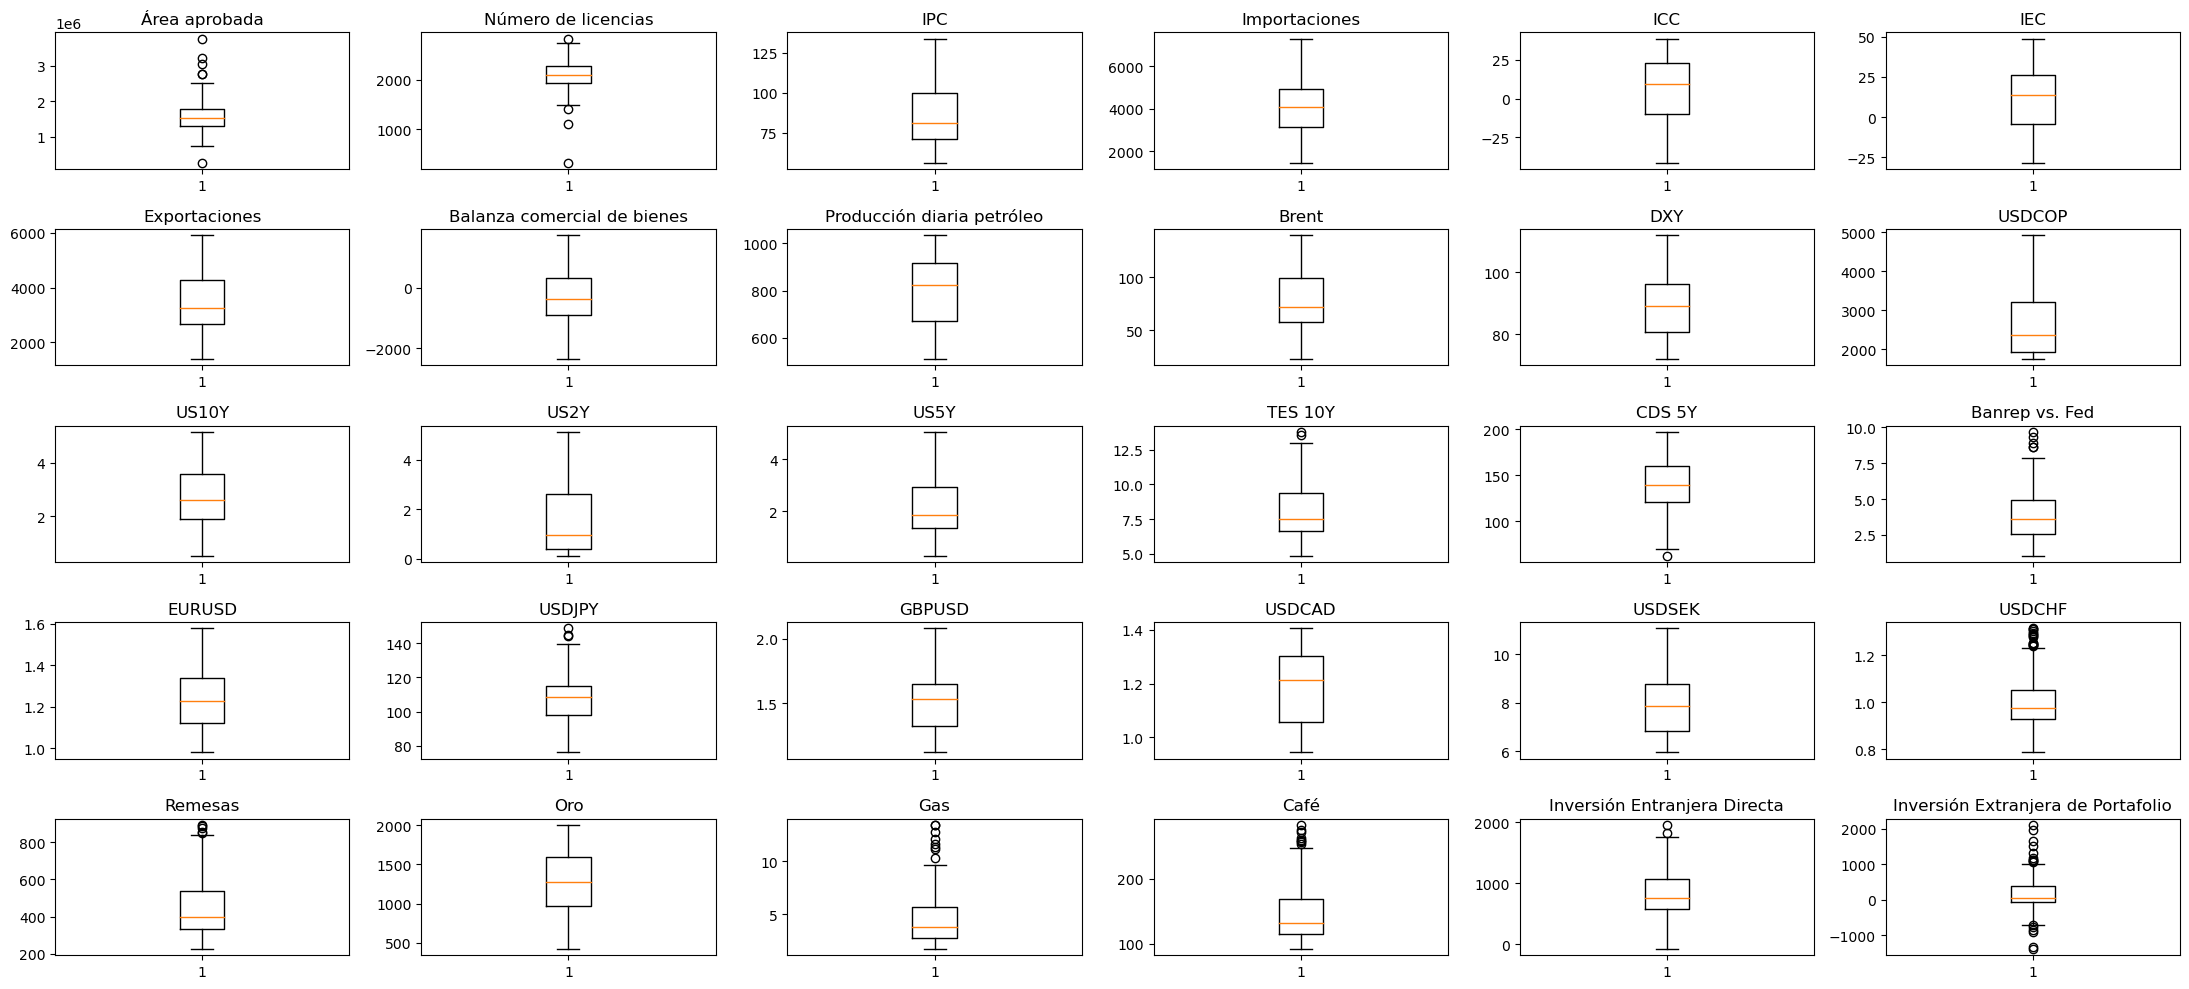

In [5]:
fig, axs = plt.subplots(5, 6, figsize=(22, 10))

nombres_variables = X.columns

for i in range(5):
    for j in range(6):
        variable_idx = i * 6 + j  
        if variable_idx < 30:  
            axs[i, j].boxplot(X.iloc[:, variable_idx], vert=True)
            axs[i, j].set_title(nombres_variables[variable_idx]) 

plt.tight_layout()

plt.show()

In [6]:
#Calculamos matriz de correlaciones
matriz_correlaciones = X.corr()
matriz_correlaciones

Área aprobada  Número de licencias  \
Área aprobada                              1.0000               0.6126   
Número de licencias                        0.6126               1.0000   
IPC                                        0.0914              -0.0144   
Importaciones                              0.4920               0.2726   
ICC                                        0.1479               0.1683   
IEC                                        0.1079               0.0991   
Exportaciones                              0.5006               0.3001   
Balanza comercial de bienes               -0.1863              -0.0737   
Producción diaria petróleo                 0.4681               0.2806   
Brent                                      0.3414               0.1725   
DXY                                        0.0110              -0.0178   
USDCOP                                    -0.0847              -0.1474   
US10Y                                     -0.1349              -0.0436   
US2Y                                      -0.2051              -0.1305   
US5Y                                      -0.1841              -0.0950   
TES 10Y                                   -0.1218              -0.1577   
CDS 5Y                                     0.0176              -0.0164   
Banrep vs. Fed                             0.0852              -0.0095   
EURUSD                                    -0.0466              -0.0316   
USDJPY                                     0.0082              -0.1077   
GBPUSD                                    -0.0472              -0.0775   
USDCAD                                    -0.1444              -0.1159   
USDSEK                                    -0.1053              -0.0892   
USDCHF                                    -0.3619              -0.1296   
Remesas                                    0.0774               0.0709   
Oro                                        0.2087               0.0193   
Gas                                       -0.1317              -0.0826   
Café                                       0.3764               0.1401   
Inversión Entranjera Directa               0.4203               0.1655   
Inversión Extranjera de Portafolio         0.2987               0.1430   

                                       IPC  Importaciones     ICC     IEC  \
Área aprobada                       0.0914         0.4920  0.1479  0.1079   
Número de licencias                -0.0144         0.2726  0.1683  0.0991   
IPC                                 1.0000         0.6809 -0.8090 -0.7283   
Importaciones                       0.6809         1.0000 -0.2788 -0.2324   
ICC                                -0.8090        -0.2788  1.0000  0.9512   
IEC                                -0.7283        -0.2324  0.9512  1.0000   
Exportaciones                       0.3218         0.8154  0.0920  0.1209   
Balanza comercial de bienes        -0.7450        -0.6194  0.6442  0.6159   
Producción diaria petróleo          0.3749         0.6567 -0.1553 -0.1928   
Brent                              -0.1099         0.4552  0.4635  0.4878   
DXY                                 0.7677         0.3387 -0.7450 -0.7322   
USDCOP                              0.8773         0.3824 -0.8337 -0.7452   
US10Y                              -0.5353        -0.5072  0.4941  0.4144   
US2Y                               -0.1509        -0.3860  0.1510  0.0896   
US5Y                               -0.3287        -0.4589  0.3001  0.2199   
TES 10Y                            -0.1716        -0.2146  0.1101  0.1032   
CDS 5Y                              0.3354         0.1271 -0.1589 -0.1593   
Banrep vs. Fed                      0.0790         0.1160 -0.1688 -0.2283   
EURUSD                             -0.7052        -0.3457  0.6725  0.6563   
USDJPY                              0.4474         0.1163 -0.4005 -0.4296   
GBPUSD                             -0.8621        -0.5498  0.7965  0.7409   
USDCAD                              0.6800     

/Users/gabrielbga/mambaforge/envs/IML_env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


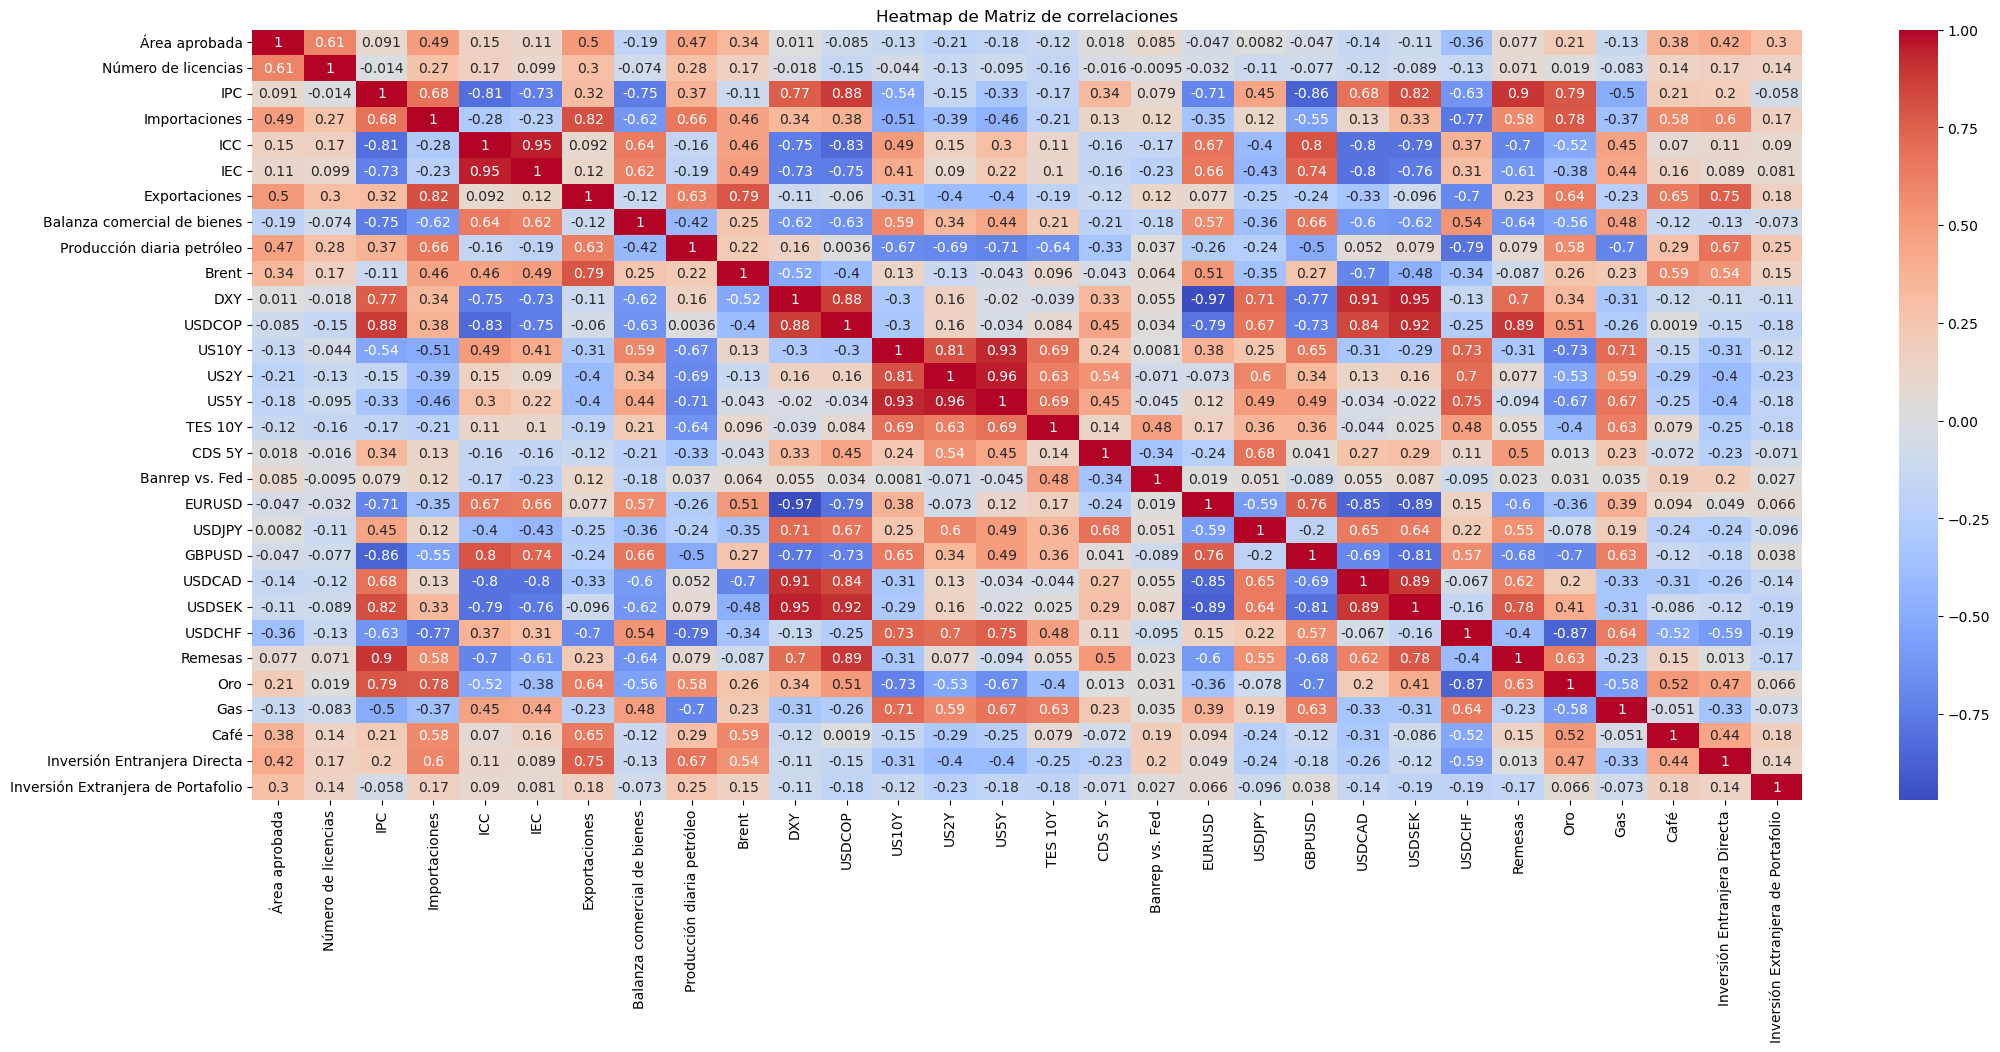

In [ ]:
# Importamos matplotlib y seaborn para visualizar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un mapa de calor
plt.figure(figsize=(25, 10))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm')
plt.title('Heatmap de Matriz de correlaciones')
plt.show()

Tal como lo dicta la literatura económica, existen unos niveles de correlación altos entre las variables de la muestra, puesto que cada una de las variables suele servir para explicar la evolución de la actividad económica en un país como Colombia. Por ejemplo:

- Correlaciones Positivas

Existen correlaciones positivas fuertes (Mayores o iguales al 80%) entre IPC- USDCOP, IPC- USDSEK, IPC - Reservas, Exportaciones - Importaciones, USDCOP - Remesas, USDCAD - DXY, USDSEK - DXY, GBPUSD - ICC. 

- Correlaciones Negativas

Existen correlaciones negativas fuertes (Mayores o iguales al 80%) entre  IPC - GBPUSD, USDCOP - ICC, USDCAD - ICC, USDCAD - ICE, EURUSD - DXY, ORO - USDCHF. 

- El IPC tiene una correlación superior al 0,7 en valor absoluto con el ICC y el IEC. La correlación es negativa y ello se debe a que los tres indicadores están mostrando una tendencia en el consumidor colombiano: Una menor confianza y expectativas del consumidor afecta directamente la inflación de dicha economía ya que ante variaciones en sus expectativas de consumo implicará un cambio en los precios de los bienes contemplados en el IPC.

Sucede algo similar con las importaciones, las cuales tratan de cuantificar el poder adquisitivo de los agentes locales a través de sus cuentas externas. Así las cosas, unos menos niveles de importaciones, deberían implicar una demanda interna debilitada que se ve reflejada en variaciones negativas en el IPC.

A su vez, la correlación positiva entre el área aprobada y el número de licencias da cuenta de la dinámica del sector constructor. Un mayor número de licencias en un mes determinado tiene a incrementar el área aprobada para construir edificaciones. 

In [9]:
variables = ['Área aprobada','Número de licencias','IPC','Importaciones','ICC','IEC', 'Exportaciones', 'Balanza comercial de bienes', 'Producción diaria petróleo', 'Brent', 'USDCOP', 'DXY', 'Oro', 'USDCAD']

# Create scatter plots
g= sns.pairplot(X[variables])
plt.show()

Se observa la existencia de 196 gráficos de dispersion son el 45% de graficos de los calculados inicialmente y 14 histogramas con las distribución de algunas variable que en el anális anterior mostraban una correlación alta entre ellas. 

Se observa la correlación positiva entre ICC e IEC por ser variables que tratan de explicar patrones en los hábitos de consumo del colombiano. Se observan patrones de comportamiento entre todas la variables escogidas con el IPC. 

La variables que presentan un menor grado de patron de comportamient frente al resto son Área aprobada y Número de licencias, pero entre ellas si exite un comportamiento más marcado. 

Así mismo, observamos que la mayoría de las variables sigue una distribución similar a la normal con leves sesgos a la derecha y a la izquierda.

## Cálculo y selección de componentes principales

Utilizando Álgebra Lineal, calcularemos los eigen valores y los eigen vectores. A partir de ellos, se obtendrán los Componentes Principales.

Luego, se examinarán los valores propios para determinar cuántos componentes principales se deben considerar. Explicaremos el criterio utilizado para la elección.

## Escalar las variables

Al contar con variables con diferentes unidades y medidas, usaremos datos  estandarizados, es decir, centrados para tener media cero y escalados para tener varianza uno.  Desde un punto estrictamente matemático no hay nada intrínsecamente incorrecto en hacer combinaciones lineales de variables con diferentes unidades de medida. Sin embargo, cuando se usa PCA se busca maximizar varianza y la varianza se ve afectada por las unidades de medida. Esto implica que los componentes principales basados en la matriz de covarianza $S$ van a cambiar si las unidades de medida de una o más variables cambian. Para que esto no suceda, es práctica habitual  estandarizar las variables. Es decir, cada valor de $X$ es centrados y dividido por la desviación estándar:

\begin{align}
z_{ij} = \frac{x_{ij}-\bar{x_j}}{s_j}
\end{align}

donde $\bar{x_j}$ es la media y ${s_j}$ es el desvío estándar de la columna $j$. Entonces, la matriz de datos iniciales $X$ es remplazada por la matriz de datos estandarizados $Z$.

In [10]:
# Estandarizamos los datos
mu = X.mean()
sigma = X.std()
Z = (X - mu)/sigma
Z.head()

Área aprobada  Número de licencias     IPC  Importaciones    ICC  \
Fecha                                                                          
2005-01-01        -1.3160              -1.8371 -1.5401        -2.0945 0.6571   
2005-02-01        -1.0832              -0.8367 -1.5099        -2.0941 0.3786   
2005-03-01        -0.8951              -0.7094 -1.4866        -1.9576 0.1537   
2005-04-01        -1.3309              -0.1155 -1.4729        -1.7867 0.3484   
2005-05-01        -1.0438              -0.6175 -1.4607        -1.8564 0.3853   

              IEC  Exportaciones  Balanza comercial de bienes  \
Fecha                                                           
2005-01-01 0.9130        -1.9541                       1.2870   
2005-02-01 0.4550        -1.8097                       1.4670   
2005-03-01 0.0985        -1.6244                       1.6686   
2005-04-01 0.3392        -1.6624                       1.6258   
2005-05-01 0.2115        -1.6098                       1.6883   

            Producción diaria petróleo   Brent  ...  GBPUSD  USDCAD  USDSEK  \
Fecha                                           ...                           
2005-01-01                     -1.7003 -1.2486  ...  1.4875  0.4366 -0.7511   
2005-02-01                     -1.7302 -1.0796  ...  1.6511  0.3821 -0.8676   
2005-03-01                     -1.6111 -0.9069  ...  1.5137  0.2005 -0.6890   
2005-04-01                     -1.6281 -1.0375  ...  1.5909  0.5773 -0.6367   
2005-05-01                     -1.6225 -1.0522  ...  1.2086  0.5403 -0.3870   

            USDCHF  Remesas     Oro    Gas    Café  \
Fecha                                                
2005-01-01  1.5313  -1.4270 -2.0325 0.7280 -1.0070   
2005-02-01  1.2915  -1.3540 -2.0323 0.7247 -0.7163   
2005-03-01  1.5943  -1.1345 -2.0073 1.0881 -0.3985   
2005-04-01  1.5840  -1.1927 -2.0189 1.1326 -0.5604   
2005-05-01  2.0369  -1.1403 -2.0371 0.8487 -0.5878   

            Inversión Entranjera Directa  Inversión Extranjera de Portafolio  
Fecha                                                                         
2005-01-01                       -1.7242                             -0.3365  
2005-02-01                       -1.5779                             -0.3043  
2005-03-01                       -1.6896                             -0.3460  
2005-04-01                       -0.3644                             -0.3535  
2005-05-01                       -1.6818                             -0.3318  

[5 rows x 30 columns]

Notemos también que al estandarizar la matriz de datos, la matriz de covarianza $S$ es simplemente la matriz de correlación de los datos original. Esto a veces en la literatura se lo conoce como la matriz de correlación de PCA.

Esto contrasta con otras técnicas de aprendizaje supervisado como la regresión lineal, donde escalar las variables no tiene ningún efecto. Si multiplicamos una variable por $\frac{1}{\alpha}$, los coeficientes estarán multiplicados por $\alpha$, no teniendo un efecto en el modelo obtenido.

In [11]:
S = Z.cov()
S

Área aprobada  Número de licencias  \
Área aprobada                              1.0000               0.6126   
Número de licencias                        0.6126               1.0000   
IPC                                        0.0914              -0.0144   
Importaciones                              0.4920               0.2726   
ICC                                        0.1479               0.1683   
IEC                                        0.1079               0.0991   
Exportaciones                              0.5006               0.3001   
Balanza comercial de bienes               -0.1863              -0.0737   
Producción diaria petróleo                 0.4681               0.2806   
Brent                                      0.3414               0.1725   
DXY                                        0.0110              -0.0178   
USDCOP                                    -0.0847              -0.1474   
US10Y                                     -0.1349              -0.0436   
US2Y                                      -0.2051              -0.1305   
US5Y                                      -0.1841              -0.0950   
TES 10Y                                   -0.1218              -0.1577   
CDS 5Y                                     0.0176              -0.0164   
Banrep vs. Fed                             0.0852              -0.0095   
EURUSD                                    -0.0466              -0.0316   
USDJPY                                     0.0082              -0.1077   
GBPUSD                                    -0.0472              -0.0775   
USDCAD                                    -0.1444              -0.1159   
USDSEK                                    -0.1053              -0.0892   
USDCHF                                    -0.3619              -0.1296   
Remesas                                    0.0774               0.0709   
Oro                                        0.2087               0.0193   
Gas                                       -0.1317              -0.0826   
Café                                       0.3764               0.1401   
Inversión Entranjera Directa               0.4203               0.1655   
Inversión Extranjera de Portafolio         0.2987               0.1430   

                                       IPC  Importaciones     ICC     IEC  \
Área aprobada                       0.0914         0.4920  0.1479  0.1079   
Número de licencias                -0.0144         0.2726  0.1683  0.0991   
IPC                                 1.0000         0.6809 -0.8090 -0.7283   
Importaciones                       0.6809         1.0000 -0.2788 -0.2324   
ICC                                -0.8090        -0.2788  1.0000  0.9512   
IEC                                -0.7283        -0.2324  0.9512  1.0000   
Exportaciones                       0.3218         0.8154  0.0920  0.1209   
Balanza comercial de bienes        -0.7450        -0.6194  0.6442  0.6159   
Producción diaria petróleo          0.3749         0.6567 -0.1553 -0.1928   
Brent                              -0.1099         0.4552  0.4635  0.4878   
DXY                                 0.7677         0.3387 -0.7450 -0.7322   
USDCOP                              0.8773         0.3824 -0.8337 -0.7452   
US10Y                              -0.5353        -0.5072  0.4941  0.4144   
US2Y                               -0.1509        -0.3860  0.1510  0.0896   
US5Y                               -0.3287        -0.4589  0.3001  0.2199   
TES 10Y                            -0.1716        -0.2146  0.1101  0.1032   
CDS 5Y                              0.3354         0.1271 -0.1589 -0.1593   
Banrep vs. Fed                      0.0790         0.1160 -0.1688 -0.2283   
EURUSD                             -0.7052        -0.3457  0.6725  0.6563   
USDJPY                              0.4474         0.1163 -0.4005 -0.4296   
GBPUSD                             -0.8621        -0.5498  0.7965  0.7409   
USDCAD                              0.6800     

Notemos que la matriz S es una matriz cuadrada:

In [12]:
S.shape

(30, 30)

## Descomposición espectral o eigendecomposición

El procedimiento para obtener los componentes principales de la matriz Z pasa por la descomposición espectral o eigendescomposición, donde los valores de los eigenvalues nos determinarán los eigenvectores o loadings a utilizar para cada componente principal.

Así las cosas, la descomposición espectral o eigendecomposición es una forma de descomponer matrices. Descomponer una matriz significa encontrar un producto de matrices que sea igual a la matriz inicial. En el caso de la eigendecomposición, descomponemos la matriz inicial en el producto de sus eigenvectores y eigenvalores.

Veamos cómo se usan los eigenvectores y eigenvalores para descomponer una matriz. Tomando los eigenvectores de una matriz $A_{m\times m}$ podemos concatenarlos y colocarlos en una matriz $P$. Entonces $P$ será una matriz cuyas columnas son los eigenvectores de $A$:

\begin{align}
A= P\Lambda P'
\end{align}

donde $\Lambda =diag(\lambda)$ es una matriz diagonal de los eigenvalores.

Es importante notar que esta descomposición sólo es válida para matrices cuadradas, como lo es la matriz de covarianza. Por lo tanto, no puede ser utilizada para matrices no cuadradas.

Obtenemos los eigenvalues y los  eigenvectores de S:

In [13]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([1.10206812e+01, 7.42295870e+00, 3.29008961e+00, 1.73367173e+00,
       1.50158209e+00, 9.79396262e-01, 8.39050286e-01, 6.52566560e-01,
       5.31205715e-01, 4.04183084e-01, 3.13405302e-01, 2.55861902e-01,
       2.36957169e-01, 1.86207170e-01, 1.32120409e-01, 1.15132615e-01,
       8.10058791e-02, 7.33457089e-02, 6.06084809e-02, 4.01786694e-02,
       3.22661737e-02, 2.48999755e-02, 1.17928436e-03, 3.08612766e-03,
       4.86305862e-03, 6.52320878e-03, 9.72609538e-03, 1.40950710e-02,
       1.55723816e-02, 1.75800851e-02])

In [14]:
eig_val_diag = np.diag(eig_val)
eig_val_diag

array([[1.10206812e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.42295870e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,

y reconstrumios $S$:

In [15]:
eig_vec.dot(eig_val_diag).dot(eig_vec.T)

array([[ 1.        ,  0.6126461 ,  0.09135903,  0.49200293,  0.14788925,
         0.10788686,  0.50061431, -0.18631066,  0.46806545,  0.34135509,
         0.01099371, -0.08470826, -0.13489273, -0.20513559, -0.18413043,
        -0.12182303,  0.01763639,  0.08519596, -0.04664664,  0.00823232,
        -0.04721631, -0.14440067, -0.10529103, -0.36194749,  0.07736923,
         0.20870636, -0.13173613,  0.37637305,  0.42034581,  0.29872426],
       [ 0.6126461 ,  1.        , -0.01444157,  0.2726373 ,  0.16833503,
         0.09911635,  0.30014088, -0.073729  ,  0.28063859,  0.17249833,
        -0.01775482, -0.14738109, -0.043608  , -0.13049957, -0.09495967,
        -0.1577432 , -0.01639415, -0.00948297, -0.03164206, -0.10767075,
        -0.07748155, -0.1158673 , -0.08922781, -0.12959347,  0.0709083 ,
         0.01929605, -0.08262257,  0.14009271,  0.16548819,  0.14304413],
       [ 0.09135903, -0.01444157,  1.        ,  0.68091628, -0.80896241,
        -0.72826635,  0.32184932, -0.74500606,  0

Recobrando de esta forma la matriz $S$ original.

## Cálculo de componentes principales y método de selección de número óptimo  de ellos

Vamos a utilizar el criterio de Kaiser y el método gráfico generado a partir de la varianza explicada acumulada por cada componente principal adicional para evaluar el número máximo de componentes principales.

### 1) Método de Kaiser:

El primer método, el de Kaiser, sugiere que solo se retengan los componentes principales cuyos eigenvalores sean mayores a 1. La idea es que se retengan aquellos componentes cuyos eigenvalues sean superiores a la media de los eigenvalues:

\begin{align}
\lambda_h> \frac{\sum_j^k \lambda_j}{k}
\end{align}

Dado que los datos están estandarizados tenemos que $\sum_j^k \lambda_j=k$, por lo que es equivalente a buscar los eigenvalues mayores a uno, que en nuestro caso son dos los eigenvalores que superan este umbral: los ubicados en el índice 0 y 1 de nuestra matriz de eigenvalores.

In [16]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([1.10206812e+01, 7.42295870e+00, 3.29008961e+00, 1.73367173e+00,
       1.50158209e+00, 9.79396262e-01, 8.39050286e-01, 6.52566560e-01,
       5.31205715e-01, 4.04183084e-01, 3.13405302e-01, 2.55861902e-01,
       2.36957169e-01, 1.86207170e-01, 1.32120409e-01, 1.15132615e-01,
       8.10058791e-02, 7.33457089e-02, 6.06084809e-02, 4.01786694e-02,
       3.22661737e-02, 2.48999755e-02, 1.17928436e-03, 3.08612766e-03,
       4.86305862e-03, 6.52320878e-03, 9.72609538e-03, 1.40950710e-02,
       1.55723816e-02, 1.75800851e-02])

In [17]:
df_eig_val = pd.DataFrame(eig_val)
df_eig_val

0
0  11.0207
1   7.4230
2   3.2901
3   1.7337
4   1.5016
5   0.9794
6   0.8391
7   0.6526
8   0.5312
9   0.4042
10  0.3134
11  0.2559
12  0.2370
13  0.1862
14  0.1321
15  0.1151
16  0.0810
17  0.0733
18  0.0606
19  0.0402
20  0.0323
21  0.0249
22  0.0012
23  0.0031
24  0.0049
25  0.0065
26  0.0097
27  0.0141
28  0.0156
29  0.0176

En este caso, 4 eigenvalues superan el umbral de 1. Tomaremos adicionalmente el quinto componente dado que este es aproximadamente 1 (0.98).

### 2) Método gráfico a partir de varianza explicada acumulada:

Para el segundo método, usaremos la librería pca de python para estimar un modelo con 30 componentes principales. Luego, de manera gráfica estableceremos un umbral de 80% de varianza explicada para determinar el número de componentes principales a utilizar en el modelo.

In [18]:
from pca import pca
model = pca(n_components=30)

In [19]:
results = model.fit_transform(Z, verbose=False)
results

{'loadings':       Área aprobada  Número de licencias     IPC  Importaciones     ICC  \
 PC1         -0.0474              -0.0159 -0.2848        -0.2041  0.2504   
 PC2          0.1650               0.1079 -0.0370         0.1724  0.1224   
 PC3          0.2279               0.1232  0.1193         0.2717  0.0905   
 PC4         -0.3380              -0.4074  0.0526        -0.0372 -0.1731   
 PC5          0.3574               0.3562 -0.1213        -0.0161  0.0022   
 PC6         -0.0158               0.2009 -0.0094        -0.0118  0.1146   
 PC7         -0.1493              -0.5407 -0.0068         0.0368  0.1045   
 PC8          0.0916              -0.0797  0.0182         0.0353 -0.0332   
 PC9          0.1166              -0.2599 -0.1180         0.1552  0.3052   
 PC10         0.3495              -0.1522 -0.0034        -0.2197 -0.1042   
 PC11         0.5287              -0.2649 -0.0578        -0.1184 -0.2437   
 PC12        -0.3097               0.1372 -0.0943         0.0748 -0.1638   


In [20]:
# Utilice este espacio para escribir el código.
# Cumulative explained variance
print(model.results['explained_var'])

[0.36735604 0.614788   0.72445765 0.78224671 0.83229944 0.86494599
 0.89291433 0.91466655 0.9323734  0.94584617 0.95629302 0.96482175
 0.97272032 0.97892723 0.98333124 0.98716899 0.98986919 0.99231405
 0.99433433 0.99567362 0.99674916 0.99757916 0.99816516 0.99868424
 0.99915407 0.99947828 0.99969572 0.99985782 0.99996069 1.        ]


In [21]:
print(model.results['variance_ratio'])

[3.67356040e-01 2.47431957e-01 1.09669654e-01 5.77890575e-02
 5.00527362e-02 3.26465421e-02 2.79683429e-02 2.17522187e-02
 1.77068572e-02 1.34727695e-02 1.04468434e-02 8.52873006e-03
 7.89857230e-03 6.20690566e-03 4.40401363e-03 3.83775383e-03
 2.70019597e-03 2.44485696e-03 2.02028270e-03 1.33928898e-03
 1.07553912e-03 8.29999185e-04 5.86002837e-04 5.19079385e-04
 4.69835699e-04 3.24203179e-04 2.17440293e-04 1.62101954e-04
 1.02870922e-04 3.93094788e-05]


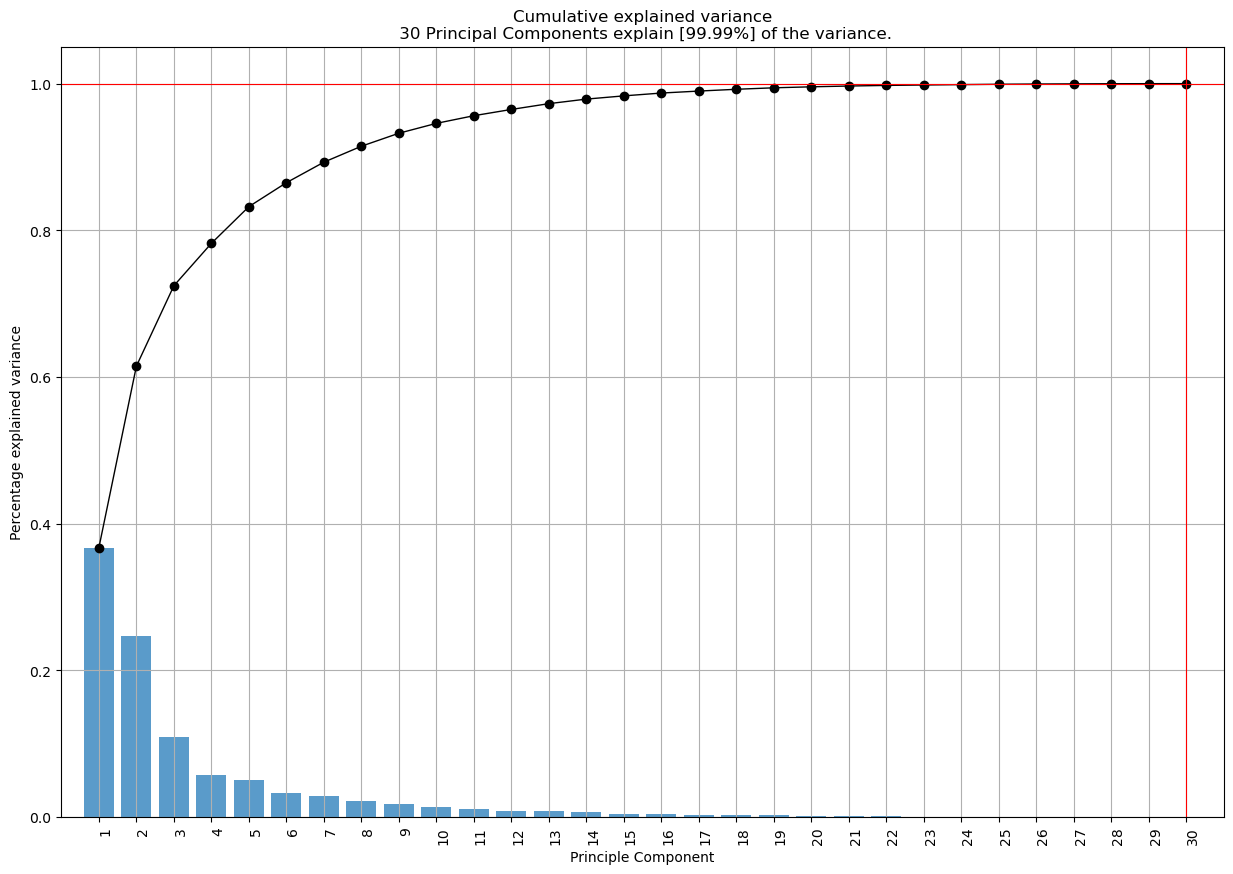

In [22]:
# Make plot
fig, ax = model.plot()

Podemos evidenciar que ambos métodos llegan a la misma conclusión: 1) por una parte, el criterio de Kaiser sugiere tomar cinco componentes principales, y 2) en el método gráfico se evidencia que se logra una varianza explicada acumulada superior al 80% a partir del quinto componente principal. Por lo que tomaremos los cinco componentes principales para la elaboración de nuestro indicador.

## Cálculo de componentes principales

Ahora bien, el primer componente principal estará compuesto por el eigenvector correspondiente al eigenvalor más alto. Así las cosas, seleccionaremos para el primer componente principal el eigenvector del eigenvalor = 11.020681.

In [23]:
df_eig_val

0
0  11.0207
1   7.4230
2   3.2901
3   1.7337
4   1.5016
5   0.9794
6   0.8391
7   0.6526
8   0.5312
9   0.4042
10  0.3134
11  0.2559
12  0.2370
13  0.1862
14  0.1321
15  0.1151
16  0.0810
17  0.0733
18  0.0606
19  0.0402
20  0.0323
21  0.0249
22  0.0012
23  0.0031
24  0.0049
25  0.0065
26  0.0097
27  0.0141
28  0.0156
29  0.0176

In [24]:
eig_vec=eig_vec.T
eig_vec[[0]]

array([[-0.04743114, -0.01592789, -0.28475303, -0.20406323,  0.25040377,
         0.23311204, -0.08632062,  0.24504914, -0.16287759,  0.07089997,
        -0.23885246, -0.24359841,  0.21452041,  0.10566136,  0.15724594,
         0.10403881, -0.0455743 , -0.02772806,  0.23420515, -0.10292752,
         0.27881461, -0.2179815 , -0.24212205,  0.20172683, -0.2355528 ,
        -0.2355573 ,  0.19567861, -0.05074817, -0.06959637, -0.00167103]])

Por lo tanto, el primer componente principal es:

\begin{align}
f_1 =  -0.047 \times Área + -0.015 \times Licencias + -0.284 \times IPC + 0.250 \times Importaciones + 0.233 \times ICC +...+ -0.050 \times Café
\end{align}

Calculando este componente para cada una de las observaciones tenemos entonces un índice que reduce las seis variables en una:

In [25]:
f1=Z.dot(eig_vec[[0]].T) #calculamos f1
f1.columns = ['CP1'] #nombramos la columna del primer componente como CP1
f1.head()

CP1
Fecha            
2005-01-01 5.0703
2005-02-01 5.0223
2005-03-01 4.8860
2005-04-01 4.7356
2005-05-01 4.4004

Podemos observar que este componente está recogiendo los valores macroeconómicos provenientes de la demanda, puesto que los mayores loadings se han asignado a las variables: IPC, importaciones, ICC e IEC. Estas recogen la fortaleza relativa de la demanda interna con el fin de identificar puntos de inflexión en la actividad económica. 

Continuando con el ejemplo anterior, el segundo componente principal es aquel que está asociado al segundo eigenvalue mayor, que es 1.96797888. 

In [26]:
eig_vec=eig_vec.T
eig_vec[[1]]

array([[-1.59278904e-02, -1.07910012e-01,  1.23248372e-01,
        -4.07372155e-01, -3.56155585e-01, -2.00922783e-01,
         5.40745086e-01,  7.96736445e-02,  2.59862884e-01,
        -1.52241707e-01,  2.64864267e-01,  1.37204297e-01,
        -2.26629028e-01,  2.24415613e-03,  2.07029792e-01,
         5.03045532e-02,  3.47250422e-02, -1.65177156e-01,
         5.60191424e-02,  1.38936652e-01,  7.17112046e-02,
        -8.31832139e-02, -7.04474452e-03, -1.18150183e-04,
        -1.33744398e-02,  1.28611818e-02,  1.35202833e-02,
         2.29877460e-02, -1.79257211e-02, -1.13272851e-02]])

Por lo tanto, el segundo componente principal es:

\begin{align}
f_1 =  0.164 \times Área + 0.107 \times Licencias + -0.036 \times IPC + 0.172 \times Importaciones + 0.122 \times ICC +...+ 0.198 \times Café
\end{align}

Calculando este componente para cada una de las observaciones tenemos entonces un índice que reduce las seis variables en una:

In [27]:
f2=Z.dot(eig_vec[[1]].T) #calculamos f1
f2.columns = ['CP2'] #nombramos la columna del primer componente como CP1
f2.head()

CP2
Fecha             
2005-01-01 -0.8101
2005-02-01 -0.6895
2005-03-01 -0.3388
2005-04-01 -0.6372
2005-05-01 -0.3732

Así mismo, observamos que el segundo componente está recogiendo los efectos macroeconómicos provenientes de la oferta, puesto que las variables Área aprobada y Número de licencias tienen los mayores loadings y están correlacionados con qué tan fuerte será el sector construcción al momento de ofrecer proyectos de vivienda. Así mismo, la variable importaciones tiene un peso importante ya que muchos de los materiales del sector edificador son importados y continúa reflejando los estímulos que tiene la oferta sobre la actividad económica.

Así, para concluir el análisis de los componentes, podemos evidenciar que el primer componente principal recoge los choques de demanda y el segundo los de oferta a la hora de construir nuestro índice adelantado de actividad económica colombiana.

Realizamos el mismo ejercicio con los tres componentes principales restantes y los almacenamos en un dataframe.

In [28]:
f3=Z.dot(eig_vec[[2]].T) #calculamos f1
f3.columns = ['CP3'] #nombramos la columna del primer componente como CP1
f3.head()

CP3
Fecha             
2005-01-01 -0.7176
2005-02-01 -0.6725
2005-03-01 -0.4238
2005-04-01 -0.1945
2005-05-01 -0.2888

In [29]:
f4=Z.dot(eig_vec[[3]].T) #calculamos f1
f4.columns = ['CP4'] #nombramos la columna del primer componente como CP1
f4.head()

CP4
Fecha            
2005-01-01 3.9513
2005-02-01 3.5592
2005-03-01 3.2631
2005-04-01 2.8090
2005-05-01 3.0936

In [30]:
f5=Z.dot(eig_vec[[4]].T) #calculamos f1
f5.columns = ['CP5'] #nombramos la columna del primer componente como CP1
f5.head()

CP5
Fecha             
2005-01-01 -0.4023
2005-02-01 -0.4867
2005-03-01 -0.5466
2005-04-01 -1.1808
2005-05-01 -0.3638

## Cálculo del índice:
En este paso, con base en la metodología del Banco de la República en el paper "Financial Conditions Index: Early and Leading Indicator for Colombia?∗", calcularemos el CLI a partir de un promedio ponderado entre cada componente y el porcentaje de varianza explicada que aporta dicho componente en la matriz de componentes principales.

In [31]:
df_5_cp = pd.concat([f1, f2, f3, f4, f5], axis=1)
df_5_cp

CP1     CP2     CP3     CP4     CP5
Fecha                                             
2005-01-01  5.0703 -0.8101 -0.7176  3.9513 -0.4023
2005-02-01  5.0223 -0.6895 -0.6725  3.5592 -0.4867
2005-03-01  4.8860 -0.3388 -0.4238  3.2631 -0.5466
2005-04-01  4.7356 -0.6372 -0.1945  2.8090 -1.1808
2005-05-01  4.4004 -0.3732 -0.2888  3.0936 -0.3638
...            ...     ...     ...     ...     ...
2023-02-01 -5.0481  2.0026  0.8843  0.4742  1.5239
2023-03-01 -5.3356  1.7724  0.9989  0.3769  1.2768
2023-04-01 -5.2496  1.9150  0.7079 -0.3712  0.8284
2023-05-01 -5.4032  2.0435  0.6831  0.1580  1.9493
2023-06-01 -4.7641  1.5781  1.2358 -0.5018  1.1091

[222 rows x 5 columns]

In [32]:
contribucion_varianza_x_componente = np.array([[model.results['variance_ratio'][0]]*222,[model.results['variance_ratio'][1]]*222,[model.results['variance_ratio'][2]]*222,[model.results['variance_ratio'][3]]*222,[model.results['variance_ratio'][4]]*222])
contribucion_varianza_x_componente = contribucion_varianza_x_componente.T
contribucion_varianza_x_componente = pd.DataFrame(contribucion_varianza_x_componente, columns=['WPC1','WPC2','WPC3','WPC4','WPC5'])
contribucion_varianza_x_componente

WPC1   WPC2   WPC3   WPC4   WPC5
0   0.3674 0.2474 0.1097 0.0578 0.0501
1   0.3674 0.2474 0.1097 0.0578 0.0501
2   0.3674 0.2474 0.1097 0.0578 0.0501
3   0.3674 0.2474 0.1097 0.0578 0.0501
4   0.3674 0.2474 0.1097 0.0578 0.0501
..     ...    ...    ...    ...    ...
217 0.3674 0.2474 0.1097 0.0578 0.0501
218 0.3674 0.2474 0.1097 0.0578 0.0501
219 0.3674 0.2474 0.1097 0.0578 0.0501
220 0.3674 0.2474 0.1097 0.0578 0.0501
221 0.3674 0.2474 0.1097 0.0578 0.0501

[222 rows x 5 columns]

In [33]:
# Realizar la suma producto
CLI = pd.DataFrame(np.sum(df_5_cp.values * contribucion_varianza_x_componente.values, axis=1), columns=['CLI'])
CLI.index = df_5_cp.index
# Mostrar el DataFrame resultante
CLI

CLI
Fecha             
2005-01-01  1.7916
2005-02-01  1.7819
2005-03-01  1.8258
2005-04-01  1.6639
2005-05-01  1.6531
...            ...
2023-02-01 -1.1583
2023-03-01 -1.3263
2023-04-01 -1.3570
2023-05-01 -1.2977
2023-06-01 -1.1976

[222 rows x 1 columns]

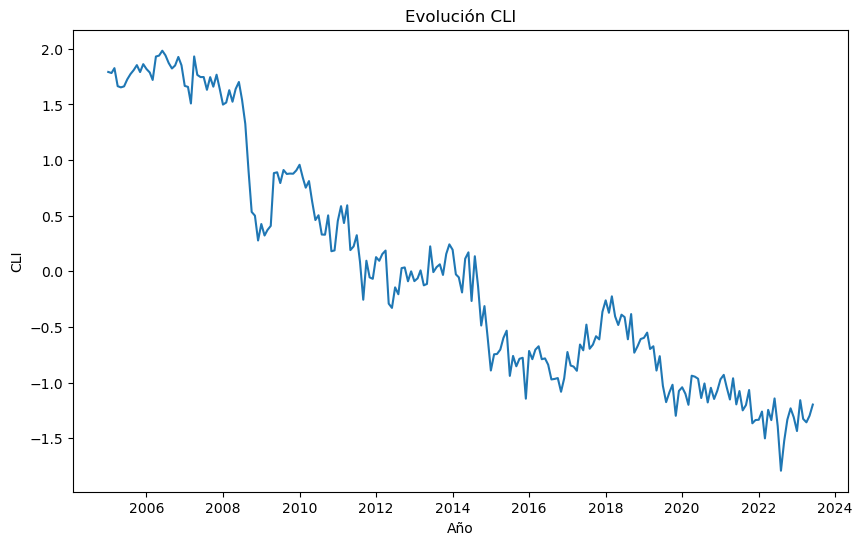

In [34]:
# Asegurarse de que el índice es de tipo datetime
CLI.index = pd.to_datetime(CLI.index)

# Crear la gráfica de línea
plt.figure(figsize=(10,6))
plt.plot(CLI)
plt.xlabel('Año')
plt.ylabel('CLI')
plt.title('Evolución CLI')
plt.show()

In [33]:
#CLI.to_excel('CLI_Colombia_3.xlsx', engine='openpyxl', index=False)

## Cálculo de componentes principales con `PyPI`


Ahora, vamos a realizar el cálculo de los componentes pricipales utilizando la biblioteca [pca](https://pypi.org/project/pca/) disponible en `PyPI`. Esta biblioteca es una herramienta de análisis de componentes principales que proporciona una interfaz fácil de usar y expande las capacidades que tiene la clase  [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)  de la librería [scikit-learn](https://scikit-learn.org/stable/) 



Entonces iniciemos importando la librería:

In [35]:
# Carguemos la librería
from pca import pca

Con la biblioteca `pca` importada, el siguiente paso es inicializar un objeto PCA. La biblioteca `pca` proporciona una clase `pca` que podemos utilizar para este propósito. Una vez que tengamos nuestro objeto PCA, podemos ajustarlo a nuestros datos.

A diferencia de la biblioteca `sklearn`, la biblioteca `pca` combina los pasos de ajuste y transformación en una sola función, lo que simplifica el proceso. Además, esta biblioteca proporciona visualizaciones integradas que nos permiten ver fácilmente los resultados del PCA.

Vamos a inicializar nuestro objeto PCA y ajustarlo a nuestros datos.

In [36]:
# Inicializamos el objeto PCA
model = pca(n_components=5)

In [37]:
# Ajustamos el PCA a nuestros datos 
CLI_pca = model.fit_transform(Z, verbose=False)
CLI_pca

{'loadings':      Área aprobada  Número de licencias     IPC  Importaciones     ICC  \
 PC1        -0.0474              -0.0159 -0.2848        -0.2041  0.2504   
 PC2         0.1650               0.1079 -0.0370         0.1724  0.1224   
 PC3         0.2279               0.1232  0.1193         0.2717  0.0905   
 PC4        -0.3380              -0.4074  0.0526        -0.0372 -0.1731   
 PC5         0.3574               0.3562 -0.1213        -0.0161  0.0022   
 
         IEC  Exportaciones  Balanza comercial de bienes  \
 PC1  0.2331        -0.0863                       0.2450   
 PC2  0.1311         0.2726                       0.0070   
 PC3  0.0950         0.2837                      -0.0112   
 PC4 -0.1270         0.0310                       0.0137   
 PC5 -0.1108        -0.0537                      -0.0979   
 
      Producción diaria petróleo   Brent  ...  GBPUSD  USDCAD  USDSEK  USDCHF  \
 PC1                     -0.1629  0.0709  ...  0.2788 -0.2180 -0.2421  0.2017   
 PC2        

La función nos retorna entonces los *loadings* y los componentes principales. Notemos que son iguales a los encontrados anteriormente.

La biblioteca `pca` proporciona varias funcionalidades extras. Entre ellas la función `biplot` que nos permite visualizar fácilmente los componentes principales y las cargas originales en un solo gráfico. 

Vamos a crear un biplot de nuestros resultados de PCA.

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


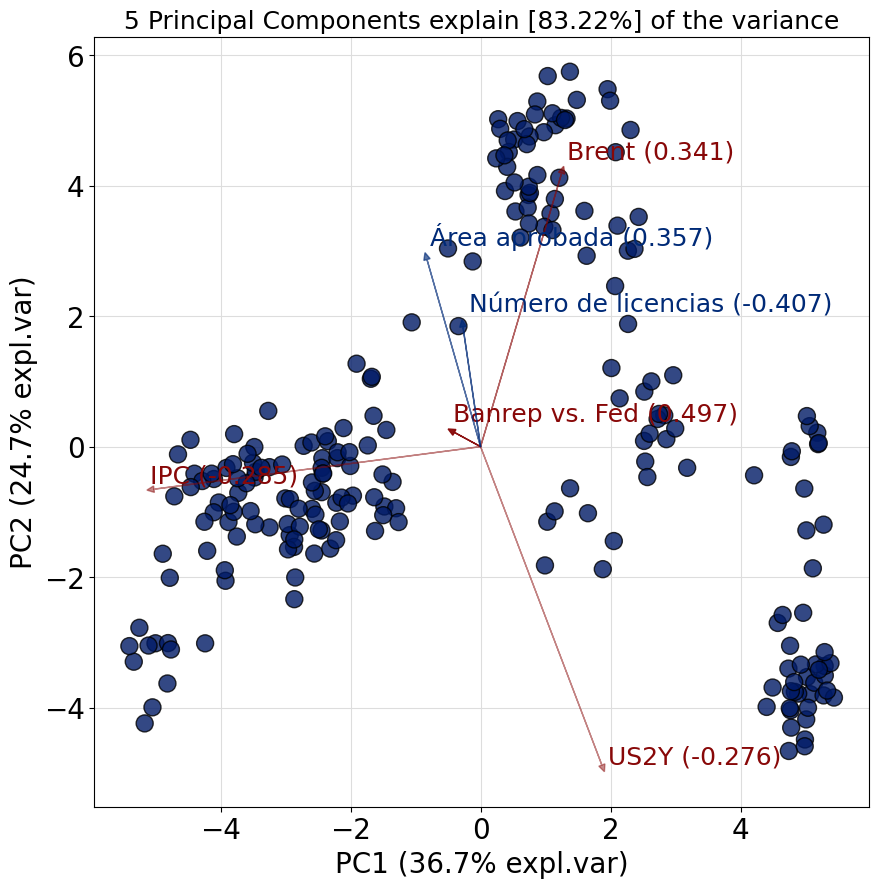

In [38]:
import matplotlib 

# Creamos el biplot
fig, ax = model.biplot(n_feat=6, legend=False, figsize=(10,10))

El biplot anterior muestra los dos primeros componentes principales (PC1 y PC2) en el eje x e y, respectivamente. Las flechas representan los *loadings*  de las variables en estos componentes. La dirección y longitud de las flechas indican cómo cada variable contribuye a los componentes principales.

En este biplot, podemos observar cómo las diferentes variables (representadas por flechas) están relacionadas entre sí y cómo están distribuidas en relación con los dos primeros componentes principales. Las observaciones (puntos) representan las proyecciones de los datos originales en el espacio de los componentes principales.

El biplot es una herramienta poderosa para la interpretación de un PCA, ya que combina información sobre las observaciones y las variables en un solo gráfico. Nos permite entender la estructura subyacente de los datos y cómo las variables contribuyen a la variabilidad capturada por los componentes principales.

Finalmente, cabe mencionar que la interpretación de un biplot puede ser un poco compleja, especialmente cuando se trata de conjuntos de datos de alta dimensionalidad. Sin embargo, sigue siendo una herramienta útil para la exploración inicial de datos y la visualización de la estructura subyacente en los datos.

## Proporción de Varianza Explicada


Una propiedad muy útil del procedimiento del cálculo de componentes principales es que la variabilidad total de $X$ es la suma de los $k$ eigenvalores de $V(X)=S$. 

Esto nos sugiere que la varianza del $j-ésimo$ componente principal es el $j-ésimo$ eigenvalor ordenado de S.

Este resultado nos permite preguntarnos: ¿Cuánta información perdimos por proyectar los datos en unos cuantos componentes principales? Esto es, ¿Cuánto de la varianza esta contenida en los primeros componentes principales?

Continuando con el ejemplo, podemos calcular la proporción de varianza contenida en cada componente principal:

In [39]:
eig_val/sum(eig_val)

array([3.67356040e-01, 2.47431957e-01, 1.09669654e-01, 5.77890575e-02,
       5.00527362e-02, 3.26465421e-02, 2.79683429e-02, 2.17522187e-02,
       1.77068572e-02, 1.34727695e-02, 1.04468434e-02, 8.52873006e-03,
       7.89857230e-03, 6.20690566e-03, 4.40401363e-03, 3.83775383e-03,
       2.70019597e-03, 2.44485696e-03, 2.02028270e-03, 1.33928898e-03,
       1.07553912e-03, 8.29999185e-04, 3.93094788e-05, 1.02870922e-04,
       1.62101954e-04, 2.17440293e-04, 3.24203179e-04, 4.69835699e-04,
       5.19079385e-04, 5.86002837e-04])

Podemos ver entonces que en este ejemplo:

- El primer componente principal explica el 36,7% del total de la varianza.

- El segundo componente principal explica el 24,7% del total de la varianza.

- El tercer componente principal explica el 10,9% del total de la varianza.

- Entre el cuarto y quinto componente se explica 10,7% del total de la varianza.

- Entre los otros 25 componentes se explica el 16,7% de la varianza restante. 

# Descomposición en Valores Singulares

A continuación, vamos a realizar una aproximación por SVD (Descomposición en Valores Singulares por sus siglas en inglés), especialmente la SVD Truncada para encontrar una matriz que logre retener la información necesaria para construir el indice buscado y al mismo tiempo reducir la dimensión de la matriz original de 222 x 30. SVD cuenta con la ventaja de que no se necesita una matriz cuadrada como sucede con la descomposición espectral por ejemplo, por tal razon no es necesario reajustar la forma de nuestra matriz de información.

Adicionalmente, sabemos que SVD es una factorización matricial en un producto de tres matrices que nos permite encontrar información relevante de una matriz de información de la siguiente manera:

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times n}{\underbrace{U}}\underset{n\times k}{\underbrace{S}}\underset{k\times k}{\underbrace{V'}}
\end{align}

donde:

1. $U$ es una matriz $n\times n$ cuyas columnas son ortogonales $(U'U=I_{n})$, y donde las columnas de $U$ son los vectores singulares de la izquierda
2. $V$ es una matriz $k\times k$ cuyas filas y columnas son  ortogonales $(V'V=VV'=I_{k})$, y las columnas de V son los vectores singulares de la derecha.
3. $S$ es una matriz $n\times k$ que contiene los $r=min(n,k)$ valores singulares $(\sigma_{i}\geq0)$ en la diagonal principal, y 0 en el resto de la matriz.

A continuación relacionamos el procedimiento:

In [40]:
# Cargamos la función SVD
from scipy.linalg import svd 
from sklearn.decomposition import TruncatedSVD

In [41]:
# Presentamos la matriz sobre la cual vamos a realizar el estudio
Z

Área aprobada  Número de licencias     IPC  Importaciones     ICC  \
Fecha                                                                           
2005-01-01        -1.3160              -1.8371 -1.5401        -2.0945  0.6571   
2005-02-01        -1.0832              -0.8367 -1.5099        -2.0941  0.3786   
2005-03-01        -0.8951              -0.7094 -1.4866        -1.9576  0.1537   
2005-04-01        -1.3309              -0.1155 -1.4729        -1.7867  0.3484   
2005-05-01        -1.0438              -0.6175 -1.4607        -1.8564  0.3853   
...                   ...                  ...     ...            ...     ...   
2023-02-01        -0.9113              -0.6917  2.3723         0.8498 -1.7932   
2023-03-01        -1.0260              -0.1225  2.4448         1.5040 -1.8296   
2023-04-01        -1.6074              -2.1200  2.4993         0.7551 -1.8453   
2023-05-01        -0.0498              -1.2079  2.5299         0.9644 -1.5329   
2023-06-01        -1.1092              -1.2468  2.5511         0.8155 -1.0800   

               IEC  Exportaciones  Balanza comercial de bienes  \
Fecha                                                            
2005-01-01  0.9130        -1.9541                       1.2870   
2005-02-01  0.4550        -1.8097                       1.4670   
2005-03-01  0.0985        -1.6244                       1.6686   
2005-04-01  0.3392        -1.6624                       1.6258   
2005-05-01  0.2115        -1.6098                       1.6883   
...            ...            ...                          ...   
2023-02-01 -1.7062         0.7596                      -0.3564   
2023-03-01 -1.6116         1.0097                      -1.0062   
2023-04-01 -1.7417         0.3136                      -0.7826   
2023-05-01 -1.5170         1.0753                      -0.4460   
2023-06-01 -1.0440         0.5514                      -0.5603   

            Producción diaria petróleo   Brent  ...  GBPUSD  USDCAD  USDSEK  \
Fecha                                           ...                           
2005-01-01                     -1.7003 -1.2486  ...  1.4875  0.4366 -0.7511   
2005-02-01                     -1.7302 -1.0796  ...  1.6511  0.3821 -0.8676   
2005-03-01                     -1.6111 -0.9069  ...  1.5137  0.2005 -0.6890   
2005-04-01                     -1.6281 -1.0375  ...  1.5909  0.5773 -0.6367   
2005-05-01                     -1.6225 -1.0522  ...  1.2086  0.5403 -0.3870   
...                                ...     ...  ...     ...     ...     ...   
2023-02-01                     -0.2102  0.3018  ... -1.4003  1.3764  2.0528   
2023-03-01                     -0.1205  0.1336  ... -1.2676  1.2780  1.9827   
2023-04-01                     -0.0509  0.1242  ... -1.1663  1.3045  1.8813   
2023-05-01                     -0.1076 -0.1567  ... -1.2235  1.3212  2.3646   
2023-06-01                     -0.0808 -0.0653  ... -1.1104  1.0669  2.3071   

            USDCHF  Remesas     Oro     Gas    Café  \
Fecha                                                 
2005-01-01  1.5313  -1.4270 -2.0325  0.7280 -1.0070   
2005-02-01  1.2915  -1.3540 -2.0323  0.7247 -0.7163   
2005-03-01  1.5943  -1.1345 -2.0073  1.0881 -0.3985   
2005-04-01  1.5840  -1.1927 -2.0189  1.1326 -0.5604   
2005-05-01  2.0369  -1.1403 -2.0371  0.8487 -0.5878   
...            ...      ...     ...     ...     ...   
2023-02-01 -0.5970   2.3791  1.4219 -0.8691  0.8731   
2023-03-01 -0.8325   2.5391  1.5679 -0.8783  0.7965   
2023-04-01 -1.0111   1.7789  1.7822 -0.9715  1.0558   
2023-05-01 -0.8696   2.6574  1.7573 -0.9264  0.9684   
2023-06-01 -1.0008   2.0713  1.6391 -0.8469  0.7699   

            Inversión Entranjera Directa  Inversión Extranjera de Portafolio  
Fecha                                                                         
2005-01-01                       -1.7242                             -0.3365  
2005-02-01                       -1.5779                             -0.3043  
2005-03-01                       -1.689

Descomponemos la matriz Z en el producto de las tres matrices:

In [42]:
# Utilizando SVD()
U,S,Vt = svd(Z)

# Identificamos las matrices resultantes y sus dimensiones:
print("\nDimension de U:", U.shape)
print('\nVectores singulares izquierdos U=', U)
print("\nDimension de S:", S.shape)
print('\nValores Singulares S=', S)
print("\nDimension de Vt:", Vt.shape)
print('\nVectores singulares derechos Vt=', Vt)


Dimension de U: (222, 222)

Vectores singulares izquierdos U= [[-0.10273768 -0.0936991  -0.06292808 ... -0.11275562 -0.01786856
  -0.0737244 ]
 [-0.10176668 -0.08720787 -0.04677619 ... -0.07388149 -0.12993432
  -0.07956602]
 [-0.09900425 -0.09348418 -0.02687773 ...  0.17607977  0.09783601
   0.15198289]
 ...
 [ 0.10637104 -0.06856527  0.11286191 ...  0.76502098 -0.06423398
  -0.17176421]
 [ 0.10948424 -0.07550723  0.13085179 ... -0.07059973  0.72495401
  -0.21968609]
 [ 0.09653378 -0.07678699  0.13133892 ... -0.16340247 -0.19848821
   0.66142204]]

Dimension de S: (30,)

Valores Singulares S= [49.35149994 40.50276376 26.96497366 19.57399937 18.21674068 14.71212337
 13.6172726  12.00904699 10.83496484  9.45116192  8.32241382  7.51967289
  7.2365416   6.41496567  5.40357385  5.04423511  4.23111088  4.02609012
  3.65984621  2.97984663  2.67036035  2.34582493  1.97109077  1.85512704
  1.76493929  1.46610609  1.20067862  1.03669473  0.82585363  0.51051136]

Dimension de Vt: (30, 30)

Vecto

Una vez logramos separar nuestra matriz Z en sus respectivas matrices de vectores singulares izquierdos, vectores singulares derechos y sus matriz S de valores singulares, seremos capaces de realizar a través de un proceso iterativo y experimental un ajuste o retención de valores singulares necesarios que nos permitan explicar la varianza de toda la matriz original. Utilizaremos el mismo umbral usado en descomposición espectral para poder tener resultados comparables:

In [43]:
# Aplicamos la SVD truncada
n_components = 30  # Número de componentes principales a retener. Usamos todos para poder iterar.
svd_truncated = TruncatedSVD(n_components=n_components)
X_reduced = svd_truncated.fit_transform(Z)

# Calculamos la varianza explicada por cada componente
explained_variance_ratio = svd_truncated.explained_variance_ratio_

# Calculamos la varianza acumulativa explicada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Imprimimos la varianza explicada por cada componente y la varianza acumulativa explicada
for i, ev in enumerate(explained_variance_ratio):
    print(f'Componente {i + 1}: {ev:.4f} ({cumulative_explained_variance[i]:.4f} acumulativa)')

# Definimos un Umbral del 0.80 similar al procedimiento por descomposición espectral 
# de la varianza acumulativa explicada
threshold = 0.80
num_components_to_retain = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f'Número de componentes para retener {threshold * 100}% de la varianza acumulativa explicada: {num_components_to_retain}')

# Matriz reducida utilizando los valores singulares retenidos que superen el umbral
X_reduced_selected = X_reduced[:, :num_components_to_retain]

Componente 1: 0.3674 (0.3674 acumulativa)
Componente 2: 0.2474 (0.6148 acumulativa)
Componente 3: 0.1097 (0.7245 acumulativa)
Componente 4: 0.0578 (0.7822 acumulativa)
Componente 5: 0.0501 (0.8323 acumulativa)
Componente 6: 0.0326 (0.8649 acumulativa)
Componente 7: 0.0280 (0.8929 acumulativa)
Componente 8: 0.0218 (0.9147 acumulativa)
Componente 9: 0.0177 (0.9324 acumulativa)
Componente 10: 0.0135 (0.9458 acumulativa)
Componente 11: 0.0104 (0.9563 acumulativa)
Componente 12: 0.0085 (0.9648 acumulativa)
Componente 13: 0.0079 (0.9727 acumulativa)
Componente 14: 0.0062 (0.9789 acumulativa)
Componente 15: 0.0044 (0.9833 acumulativa)
Componente 16: 0.0038 (0.9872 acumulativa)
Componente 17: 0.0027 (0.9899 acumulativa)
Componente 18: 0.0024 (0.9923 acumulativa)
Componente 19: 0.0020 (0.9943 acumulativa)
Componente 20: 0.0013 (0.9957 acumulativa)
Componente 21: 0.0011 (0.9967 acumulativa)
Componente 22: 0.0008 (0.9976 acumulativa)
Componente 23: 0.0006 (0.9982 acumulativa)
Componente 24: 0.000

El resultado nos indica que 5 valores singulares son suficientes para explicar >80% de la varianza de la información contenida en la matriz original. Veamos como nos queda la matriz de 5 valores singulares:

In [44]:
# valores singulares retenidos
l= num_components_to_retain

# Realizamos un ejercicio con los valores singulares retenidos
var_explained = np.round(S**2/np.sum(S**2), decimals=6)
print(f"Varianza Explicada con {l} valores singulares igual a: {sum(var_explained[0:l])*100}%", )

S2= np.resize(S,[l,1])*np.eye(l,l) #ponemos los valores singulares en una matriz diagonal

print("\nDimension de S2 en una matriz diagonal: ", S2.shape) 
print("\nS2=\n",S2)

Varianza Explicada con 5 valores singulares igual a: 83.23%

Dimension de S2 en una matriz diagonal:  (5, 5)

S2=
 [[49.35149994  0.          0.          0.          0.        ]
 [ 0.         40.50276376  0.          0.          0.        ]
 [ 0.          0.         26.96497366  0.          0.        ]
 [ 0.          0.          0.         19.57399937  0.        ]
 [ 0.          0.          0.          0.         18.21674068]]


Ahora reconstruimos la matriz de 222 rows × 30 columns original con estos 5 componentes:

In [45]:
def svd_truncada(l, X):
    """
     Esta función retorna la aproximación a la matriz original a partir de la SVD truncada

    Parameters:
        l (int):  número de valores singulares a utilizar en la reconstrucción
        X (array): matriz original a descomponer

    Returns:
        resultado (array): reconstrucción de X con l componentes principales
    """
    # SVD 
    U,S,Vt = svd(X)

    
    S2= np.resize(S,[l,1])*np.eye(l,l) #ponemos los valores singulares en una matriz diagonal
    
    # SVD truncada
    return(np.dot(U[:,0:l],np.dot(S2,Vt[0:l,:])))

# Matriz Original reconstruida con los componentes principales que explican >80% de la varianza:
pd.DataFrame(svd_truncada(l, Z))

0       1       2       3       4       5       6       7       8   \
0   -1.6254 -1.1595 -1.4580 -2.1993  0.4337  0.3463 -1.9225  1.2374 -1.8459   
1   -1.2534 -0.8202 -1.4527 -2.0138  0.5675  0.4393 -1.7489  1.1940 -1.7007   
2   -1.1200 -0.7328 -1.3561 -1.8860  0.5515  0.4114 -1.6611  1.1402 -1.7557   
3   -0.9368 -0.5634 -1.3666 -1.8000  0.5786  0.4128 -1.5719  1.0826 -1.5812   
4   -1.0652 -0.6109 -1.2950 -1.9281  0.4295  0.2643 -1.8152  1.0086 -1.6309   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
217 -0.5984 -1.1051  2.2052  1.2509 -1.8892 -1.6615  0.4969 -1.2410 -0.8517   
218 -0.3903 -0.9252  2.2223  1.4042 -1.8602 -1.6460  0.6697 -1.3224 -0.5791   
219 -0.9138 -1.4802  2.2185  1.2996 -1.9837 -1.6728  0.7007 -1.2321 -0.6345   
220 -0.0774 -0.5920  2.1537  1.4497 -1.7801 -1.6277  0.6864 -1.3815 -0.3832   
221 -0.5623 -1.0837  2.1011  1.3118 -1.7010 -1.4440  0.6798 -1.1361 -0.6874   

         9   ...      20      21      22      23      24      25     26  \
0   -1.0292  ...  1.2331 -0.1391 -0.5176  1.9409 -1.1731 -1.8360 1.1706   
1   -0.8982  ...  1.2582 -0.1828 -0.5448  1.9014 -1.1431 -1.8523 1.1954   
2   -0.8058  ...  1.2481 -0.1324 -0.4396  1.9251 -0.9913 -1.8474 1.3247   
3   -0.7873  ...  1.2022 -0.1488 -0.4729  1.8361 -1.0446 -1.8226 1.2244   
4   -1.0892  ...  1.0972  0.0886 -0.3049  1.9309 -0.9766 -1.8729 1.1264   
..      ...  ...     ...     ...     ...     ...     ...     ...    ...   
217  0.2545  ... -1.3024  1.4872  2.1870 -0.4279  2.4987  1.2445 0.5880   
218  0.3270  ... -1.3857  1.4286  2.1207 -0.6242  2.4439  1.3627 0.4053   
219  0.4293  ... -1.4171  1.2519  1.9899 -0.8175  2.3524  1.6035 0.2984   
220  0.2525  ... -1.4036  1.4616  2.0917 -0.6228  2.3445  1.2653 0.3097   
221  0.4647  ... -1.2132  1.2150  1.9273 -0.5984  2.3540  1.3624 0.4862   

         27      28      29  
0   -1.2599 -1.5095 -0.6874  
1   -1.1717 -1.3719 -0.5140  
2   -1.0689 -1.3342 -0.5068  
3   -1.0301 -1.2207 -0.3869  
4   -1.2813 -1.4250 -0.4373  
..      ...     ...     ...  
217  1.0370 -0.0000 -1.0106  
218  1.1270  0.1869 -0.8671  
219  1.2596  0.2269 -1.1027  
220  1.0619  0.2553 -0.6659  
221  1.1389  0.1504 -0.9502  

[222 rows x 30 columns]

In [46]:
# Matriz reducida con los componentes que mejor explican la información de la matriz original:
X_reduced_selected = pd.DataFrame(X_reduced_selected)
X_reduced_selected

0       1       2      3       4
0    5.0703 -3.7951 -1.6969 1.2618  0.1516
1    5.0223 -3.5322 -1.2613 0.8359  0.3845
2    4.8860 -3.7864 -0.7248 0.8333  0.5122
3    4.7356 -3.4032 -0.7679 0.7106  0.7397
4    4.4004 -3.9903 -1.1586 0.4662  0.6248
..      ...     ...     ...    ...     ...
217 -5.0481 -3.9969  3.7036 2.7177 -0.2908
218 -5.3356 -3.2969  3.5974 2.5758 -0.1363
219 -5.2496 -2.7771  3.0433 3.4853 -0.6161
220 -5.4032 -3.0583  3.5284 2.1530  0.2644
221 -4.7641 -3.1101  3.5416 2.5796 -0.5886

[222 rows x 5 columns]

Ahora con nuestra matriz reducida, aplicaremos el mismo procedimiento utilizado en descomposición espectral con el modelo creado de PCA (el cual es el recomendado por la OCDE en su metodología propuesta para poder contribuir en la busqueda de CLI) para obtener la contribución de la varianza:

In [47]:
contribucion_varianza_x_componente_svd = np.array([[model.results['variance_ratio'][0]]*222,[model.results['variance_ratio'][1]]*222,[model.results['variance_ratio'][2]]*222,[model.results['variance_ratio'][3]]*222,[model.results['variance_ratio'][4]]*222])
contribucion_varianza_x_componente_svd = contribucion_varianza_x_componente.T
contribucion_varianza_x_componente_svd = pd.DataFrame(contribucion_varianza_x_componente, columns=['WPC1','WPC2','WPC3','WPC4','WPC5'])
contribucion_varianza_x_componente_svd

WPC1   WPC2   WPC3   WPC4   WPC5
0   0.3674 0.2474 0.1097 0.0578 0.0501
1   0.3674 0.2474 0.1097 0.0578 0.0501
2   0.3674 0.2474 0.1097 0.0578 0.0501
3   0.3674 0.2474 0.1097 0.0578 0.0501
4   0.3674 0.2474 0.1097 0.0578 0.0501
..     ...    ...    ...    ...    ...
217 0.3674 0.2474 0.1097 0.0578 0.0501
218 0.3674 0.2474 0.1097 0.0578 0.0501
219 0.3674 0.2474 0.1097 0.0578 0.0501
220 0.3674 0.2474 0.1097 0.0578 0.0501
221 0.3674 0.2474 0.1097 0.0578 0.0501

[222 rows x 5 columns]

Realizamos la suma producto de nuestra matriz reducida y la contribución de la varianza por componente anterior:

In [48]:
# Realizar la suma producto
CLI_svd = pd.DataFrame(np.sum(X_reduced_selected.values * contribucion_varianza_x_componente.values, axis=1), columns=['CLI'])
CLI_svd.index = Z.index
# Mostrar el DataFrame resultante
CLI_svd

CLI
Fecha             
2005-01-01  0.8180
2005-02-01  0.9002
2005-03-01  0.8523
2005-04-01  0.8915
2005-05-01  0.5603
...            ...
2023-02-01 -2.2947
2023-03-01 -2.2393
2023-04-01 -2.1113
2023-05-01 -2.2170
2023-06-01 -2.0116

[222 rows x 1 columns]

Y finalmente con nuestro CLI resultante procedemos a graficar el resultado para observar el comportamiento del indice en el tiempo:

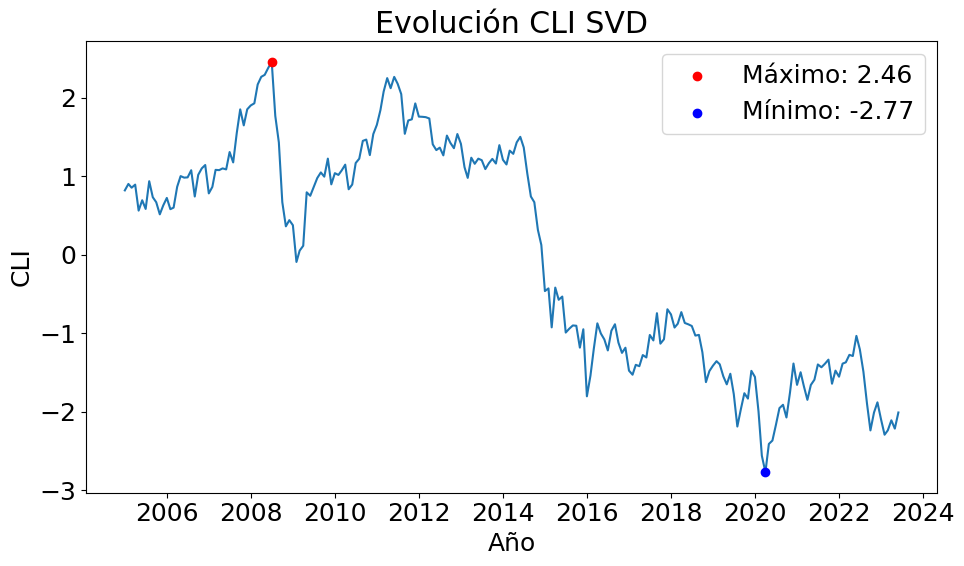

In [49]:
# Asegurarse de que el índice es de tipo datetime
CLI_svd.index = pd.to_datetime(CLI_svd.index)

# Crear la gráfica de línea
plt.figure(figsize=(10,6))
plt.plot(CLI_svd)

# Encuentra el valor máximo y mínimo en la serie CLI_svd
max_value = round(CLI_svd.max().values[0], 4)
min_value = round(CLI_svd.min().values[0], 4)

# Creamos el punto maximo y el punto minimo
plt.scatter(CLI_svd.idxmax(), max_value, color='red', label='Máximo: {:.2f}'.format(max_value), zorder=5)
plt.scatter(CLI_svd.idxmin(), min_value, color='blue', label='Mínimo: {:.2f}'.format(min_value), zorder=5)

plt.xlabel('Año')
plt.ylabel('CLI')
plt.title('Evolución CLI SVD')
plt.legend()
plt.tight_layout()
plt.show()

Se observa entonces que el rango máximo y minimo del CLI es mucho más amplio que por el metodo de la descomposición espectral, su pico máximo esta cercano al año 2008 y su pico minimo esta en el 2020, demostrando un impacto claro sobre el CLI causado por la pandemia mundial del COVID, y a partir de ahí se puede ver como este CLI empieza a tener una recuperación importante.

## Escenarios de choque con el índice de China

Ahora bien, retomando entonces la metodología adelantada por la OCDE, realizaremos ejercicios de elasticidad entre el índice de China y el CLI calculado para Colombia con el fin de estimar el efecto de una variación de una unidad en el índice de China en el CLI Colombiano. 

Importamos el índice de China:

In [50]:
# Cargamos y visualizamos la primeras observaciones de los datos
China = pd.read_excel('BDD_.xlsx', sheet_name='China')

China = China.set_index("Fecha")
China.head()

Índice China
Fecha                   
2005-01-01       74.9345
2005-02-01       76.2834
2005-03-01       75.5968
2005-04-01       75.3700
2005-05-01       75.2193

In [51]:
df_elasticidad = pd.concat([CLI, China], axis=1)
df_elasticidad

CLI  Índice China
Fecha                           
2005-01-01  1.7916       74.9345
2005-02-01  1.7819       76.2834
2005-03-01  1.8258       75.5968
2005-04-01  1.6639       75.3700
2005-05-01  1.6531       75.2193
...            ...           ...
2023-02-01 -1.1583      115.4502
2023-03-01 -1.3263      115.1156
2023-04-01 -1.3570      114.8925
2023-05-01 -1.2977      114.7809
2023-06-01 -1.1976      114.5578

[222 rows x 2 columns]

In [52]:
import statsmodels.api as sm
# Definir las variables endógena y exógena
X_exo_1 = df_elasticidad['Índice China']  # Variable exógena
y_1 = df_elasticidad['CLI']  # Variable endógena

# Añadir una constante a la variable exógena
X_exo_1 = sm.add_constant(X_exo_1)

# Crear un modelo de regresión lineal ordinaria (OLS)
model_regresion_1 = sm.OLS(y_1, X_exo_1)

# Ajustar el modelo
results_regresion_1 = model_regresion_1.fit()

# Imprimir los resultados
print(results_regresion_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLI   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     2250.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          1.62e-117
Time:                        21:49:59   Log-Likelihood:                -58.304
No. Observations:                 222   AIC:                             120.6
Df Residuals:                     220   BIC:                             127.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.8289      0.166     47.052   

Observamos que el índice de China explica un 91% la variabilidad del índice colombiano a través del R2 ajustado. Ante un aumento de 1 unidad en el índice de China, el índice de Colombia disminuye -0.0811.

## Método usando las variables sugeridas por la OCDE

Ahora realizaremos el ejercicio utilizando las variables sugeridas por la OCDE, a saber: las licencias de construcción, los metros cuadrados licitados para construcción, las importaciones, el IPC, el índice de confianza del consumidor y el índice de expectativas del consumidor para contrastar el ejercicios basados en las variables propuestas por la literatura económica:

 - El área aprobada para construcción de edificaciones 
 - El número de licencias otorgadas según el área aprobada 
 - El índice de precios al consumidor (IPC)
 - Las importaciones CIF en dólares
 - El índice de confianza del consumidor (ICC)
 - El índice de expectativas del consumidor (IEC). 

In [53]:
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np

# Cargamos y visualizamos la primeras observaciones de los datos
X_depurada = pd.read_excel('BDD_.xlsx', sheet_name='X_depurada')

X_depurada = X_depurada.set_index("Fecha")
X_depurada.head()


Área aprobada  Número de licencias     IPC  Importaciones     ICC  \
Fecha                                                                           
2005-01-01         990141                 1575 56.4500      1464.0532 19.2700   
2005-02-01        1094253                 1858 57.0200      1464.5043 13.9200   
2005-03-01        1178351                 1894 57.4600      1631.1742  9.6000   
2005-04-01         983506                 2062 57.7200      1839.7800 13.3400   
2005-05-01        1111891                 1920 57.9500      1754.6622 14.0500   

               IEC  
Fecha               
2005-01-01 26.6033  
2005-02-01 18.8567  
2005-03-01 12.8267  
2005-04-01 16.8967  
2005-05-01 14.7367

Para este primer paso, llamamos el archivo "BDD", el cual contiene la base de datos con las variables implicadas en el ejercicio, a saber:

 - El área aprobada para construcción de edificaciones 
 - El número de licencias otorgadas según el área aprobada 
 - El índice de precios al consumidor (IPC)
 - Las importaciones CIF en dólares
 - El índice de confianza del consumidor (ICC)
 - El índice de expectativas del consumidor (IEC). 

Declaramos la variable Fecha como el índice de nuestro dataframe.

In [54]:
#Calculamos matriz de correlaciones
matriz_correlaciones_depurada = X_depurada.corr()
matriz_correlaciones_depurada

Área aprobada  Número de licencias     IPC  \
Área aprobada               1.0000               0.6126  0.0914   
Número de licencias         0.6126               1.0000 -0.0144   
IPC                         0.0914              -0.0144  1.0000   
Importaciones               0.4920               0.2726  0.6809   
ICC                         0.1479               0.1683 -0.8090   
IEC                         0.1079               0.0991 -0.7283   

                     Importaciones     ICC     IEC  
Área aprobada               0.4920  0.1479  0.1079  
Número de licencias         0.2726  0.1683  0.0991  
IPC                         0.6809 -0.8090 -0.7283  
Importaciones               1.0000 -0.2788 -0.2324  
ICC                        -0.2788  1.0000  0.9512  
IEC                        -0.2324  0.9512  1.0000

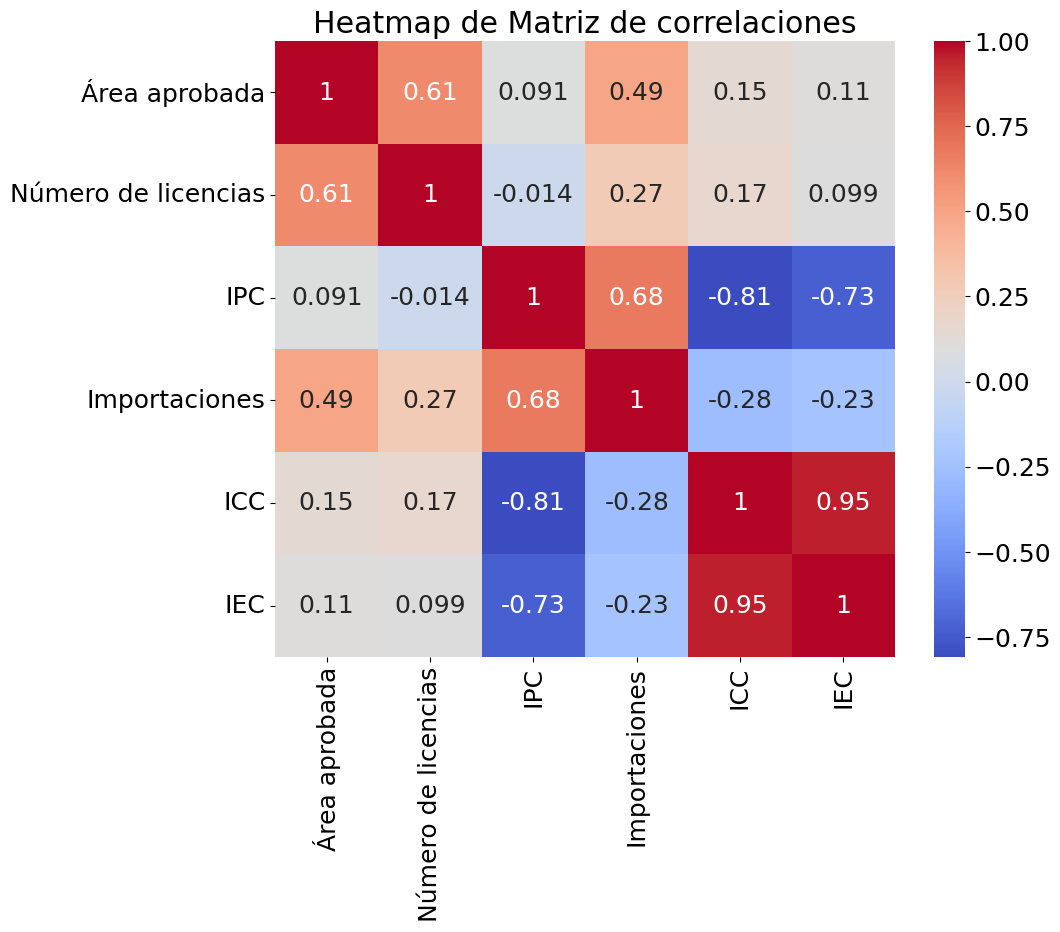

In [55]:
# Importamos matplotlib y seaborn para visualizar datos
import seaborn as sns
import matplotlib.pyplot as plt



# Creamos un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlaciones_depurada, annot=True, cmap='coolwarm')
plt.title('Heatmap de Matriz de correlaciones')
plt.show()

Tal como lo dicta la literatura económica, existen unos niveles de correlación altos entre las variables de la muestra, puesto que cada una de las variables suele servir para explicar la evolución de la actividad económica en un país como Colombia. Por ejemplo, el IPC tiene una correlación superior al 0,7 en valor absoluto con el ICC y el IEC. La correlación es negativa y ello se debe a que los tres indicadores están mostrando una tendencia en el consumidor colombiano: Una menor confianza y expectativas del consumidor afecta directamente la inflación de dicha economía ya que ante variaciones en sus expectativas de consumo implicará un cambio en los precios de los bienes contemplados en el IPC.

Sucede algo similar con las importaciones, las cuales tratan de cuantificar el poder adquisitivo de los agentes locales a través de sus cuentas externas. Así las cosas, unos menos niveles de importaciones, deberían implicar una demanda interna debilitada que se ve reflejada en variaciones negativas en el IPC.

A su vez, la correlación positiva entre el área aprobada y el número de licencias da cuenta de la dinámica del sector constructor. Un mayor número de licencias en un mes determinado tiene a incrementar el área aprobada para construir edificaciones. 

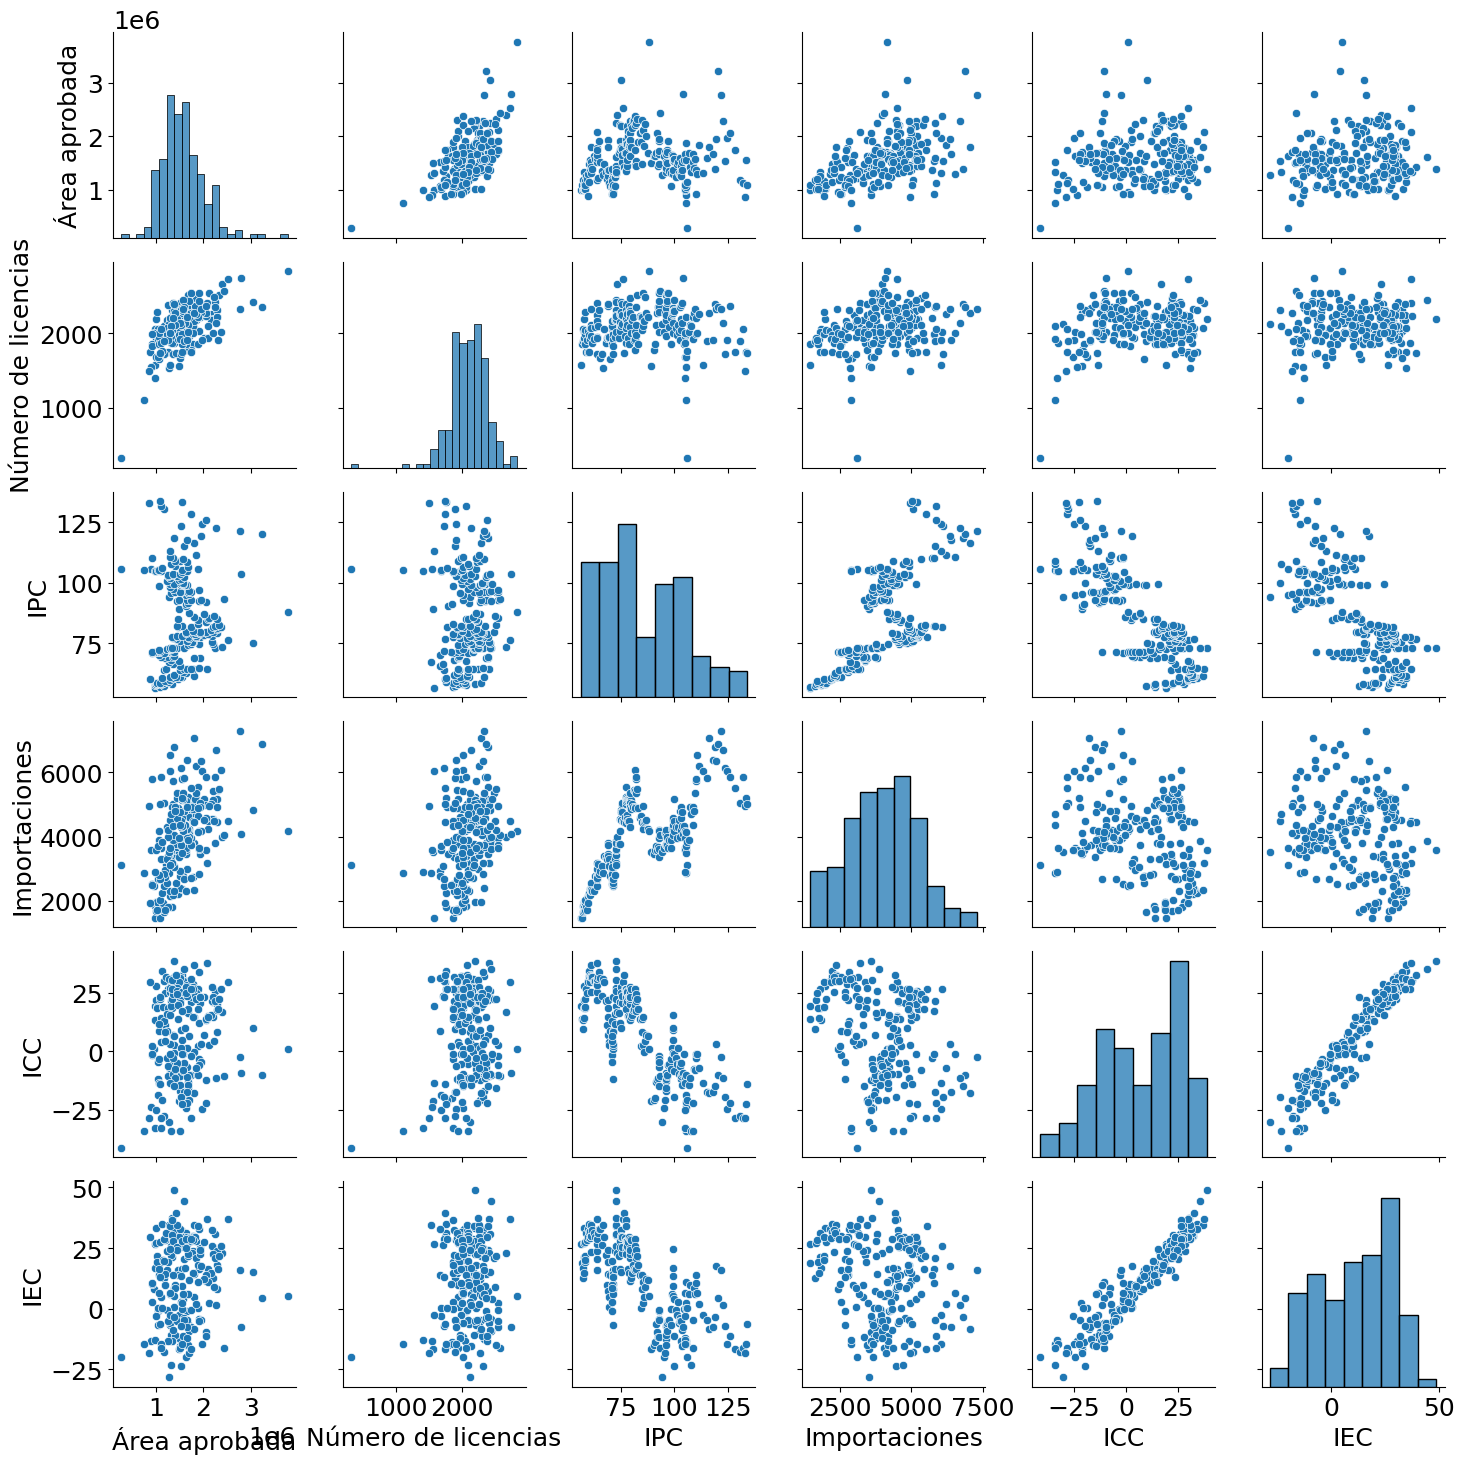

In [56]:
variables = ['Área aprobada','Número de licencias','IPC','Importaciones','ICC','IEC']

# Create scatter plots
g= sns.pairplot(X_depurada[variables])
plt.show()

Se observa la existencia de 15 gráficos de dispersion tal cual como lo calculamos al inicio y 6 histogramas con las distribución de cada una de las variables. Además, se observa la correlación positiva entre ICC e IEC por ser variables que tratan de explicar patrones en los hábitos de consumo del colombiano. También se observa un patrón similar entre Área aprobada y Número de licencias e Importaciones con IPC. Así mismo, observamos que la mayoría de las variables sigue una distribución similar a la normal con leves sesgos a la derecha y a la izquierda. Cabe resaltar que no hay missing values.

## Cálculo y selección de componentes principales

El procedimiento para obtener los componentes principales de la matriz Z pasa por la descomposición espectral o eigendescomposición, donde los valores de los eigenvalues nos determinarán los eigenvectores o loadings a utilizar para cada componente principal.

Escalamos nuevamente las variables:

In [57]:
# Estandarizamos los datos
mu_depurada = X_depurada.mean()
sigma_depurada = X_depurada.std()
Z_depurada = (X_depurada - mu_depurada)/sigma_depurada
Z_depurada.head()

Área aprobada  Número de licencias     IPC  Importaciones    ICC  \
Fecha                                                                          
2005-01-01        -1.3160              -1.8371 -1.5401        -2.0945 0.6571   
2005-02-01        -1.0832              -0.8367 -1.5099        -2.0941 0.3786   
2005-03-01        -0.8951              -0.7094 -1.4866        -1.9576 0.1537   
2005-04-01        -1.3309              -0.1155 -1.4729        -1.7867 0.3484   
2005-05-01        -1.0438              -0.6175 -1.4607        -1.8564 0.3853   

              IEC  
Fecha              
2005-01-01 0.9130  
2005-02-01 0.4550  
2005-03-01 0.0985  
2005-04-01 0.3392  
2005-05-01 0.2115

In [58]:
S_depurada = Z_depurada.cov()
S_depurada

Área aprobada  Número de licencias     IPC  \
Área aprobada               1.0000               0.6126  0.0914   
Número de licencias         0.6126               1.0000 -0.0144   
IPC                         0.0914              -0.0144  1.0000   
Importaciones               0.4920               0.2726  0.6809   
ICC                         0.1479               0.1683 -0.8090   
IEC                         0.1079               0.0991 -0.7283   

                     Importaciones     ICC     IEC  
Área aprobada               0.4920  0.1479  0.1079  
Número de licencias         0.2726  0.1683  0.0991  
IPC                         0.6809 -0.8090 -0.7283  
Importaciones               1.0000 -0.2788 -0.2324  
ICC                        -0.2788  1.0000  0.9512  
IEC                        -0.2324  0.9512  1.0000

In [59]:
eig_val_depurada, eig_vec_depurada = np.linalg.eig(S_depurada)
eig_val_depurada

array([2.9126723 , 1.96797888, 0.66182467, 0.33018101, 0.09655556,
       0.03078757])

In [60]:
eig_val_diag_depurada = np.diag(eig_val_depurada)
eig_val_diag_depurada

array([[2.9126723 , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.96797888, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.66182467, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.33018101, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.09655556,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03078757]])

y reconstrumios $S$:

In [61]:
eig_vec_depurada.dot(eig_val_diag_depurada).dot(eig_vec_depurada.T)

array([[ 1.        ,  0.6126461 ,  0.09135903,  0.49200293,  0.14788925,
         0.10788686],
       [ 0.6126461 ,  1.        , -0.01444157,  0.2726373 ,  0.16833503,
         0.09911635],
       [ 0.09135903, -0.01444157,  1.        ,  0.68091628, -0.80896241,
        -0.72826635],
       [ 0.49200293,  0.2726373 ,  0.68091628,  1.        , -0.27877929,
        -0.23238145],
       [ 0.14788925,  0.16833503, -0.80896241, -0.27877929,  1.        ,
         0.95122745],
       [ 0.10788686,  0.09911635, -0.72826635, -0.23238145,  0.95122745,
         1.        ]])

## Cálculo de componentes principales y método de selección de número óptimo  de ellos

### Método de Kaiser:

In [62]:
eig_val_depurada, eig_vec_depurada = np.linalg.eig(S_depurada)
eig_val_depurada

array([2.9126723 , 1.96797888, 0.66182467, 0.33018101, 0.09655556,
       0.03078757])

In [63]:
df_eig_val_depurada = pd.DataFrame(eig_val_depurada)
df_eig_val_depurada

0
0 2.9127
1 1.9680
2 0.6618
3 0.3302
4 0.0966
5 0.0308

En este caso, 2 eigenvalues superan el umbral de 1.

### 2) Método gráfico a partir de varianza explicada acumulada:

In [64]:
from pca import pca
model_depurada = pca(n_components=6)

In [65]:
results_depurada = model_depurada.fit_transform(Z_depurada, verbose=False)
results_depurada

{'loadings':      Área aprobada  Número de licencias     IPC  Importaciones     ICC     IEC
 PC1         0.0390              -0.0171  0.5550         0.3480 -0.5439 -0.5228
 PC2        -0.6393              -0.5771 -0.0595        -0.4309 -0.1961 -0.1748
 PC3        -0.0543              -0.6120  0.2228         0.5976  0.2465  0.3937
 PC4         0.7533              -0.5384 -0.1927        -0.2467 -0.1100 -0.1806
 PC5         0.1390               0.0290  0.7015        -0.5086 -0.0573  0.4752
 PC6         0.0001              -0.0379  0.3312        -0.1287  0.7678 -0.5318,
 'PC':                PC1    PC2     PC3     PC4     PC5     PC6
 2005-01-01 -2.4382 2.6072  0.1225  0.5741  0.1450 -0.1519
 2005-02-01 -2.0384 2.0137 -0.7445  0.3183  0.0256 -0.1502
 2005-03-01 -1.6641 1.8662 -0.9416  0.4424 -0.1542 -0.1480
 2005-04-01 -1.8558 1.6474 -1.0335 -0.3153 -0.1716 -0.1665
 2005-05-01 -1.8069 1.7979 -0.8220  0.2051 -0.1651 -0.0381
 ...            ...    ...     ...     ...     ...     ...
 2023-02

In [66]:
# Utilice este espacio para escribir el código.
# Cumulative explained variance
print(model_depurada.results['explained_var'])

[0.48544538 0.81344186 0.92374598 0.97877614 0.99486874 1.        ]


In [67]:
print(model_depurada.results['variance_ratio'])

[0.48544538 0.32799648 0.11030411 0.05503017 0.01609259 0.00513126]


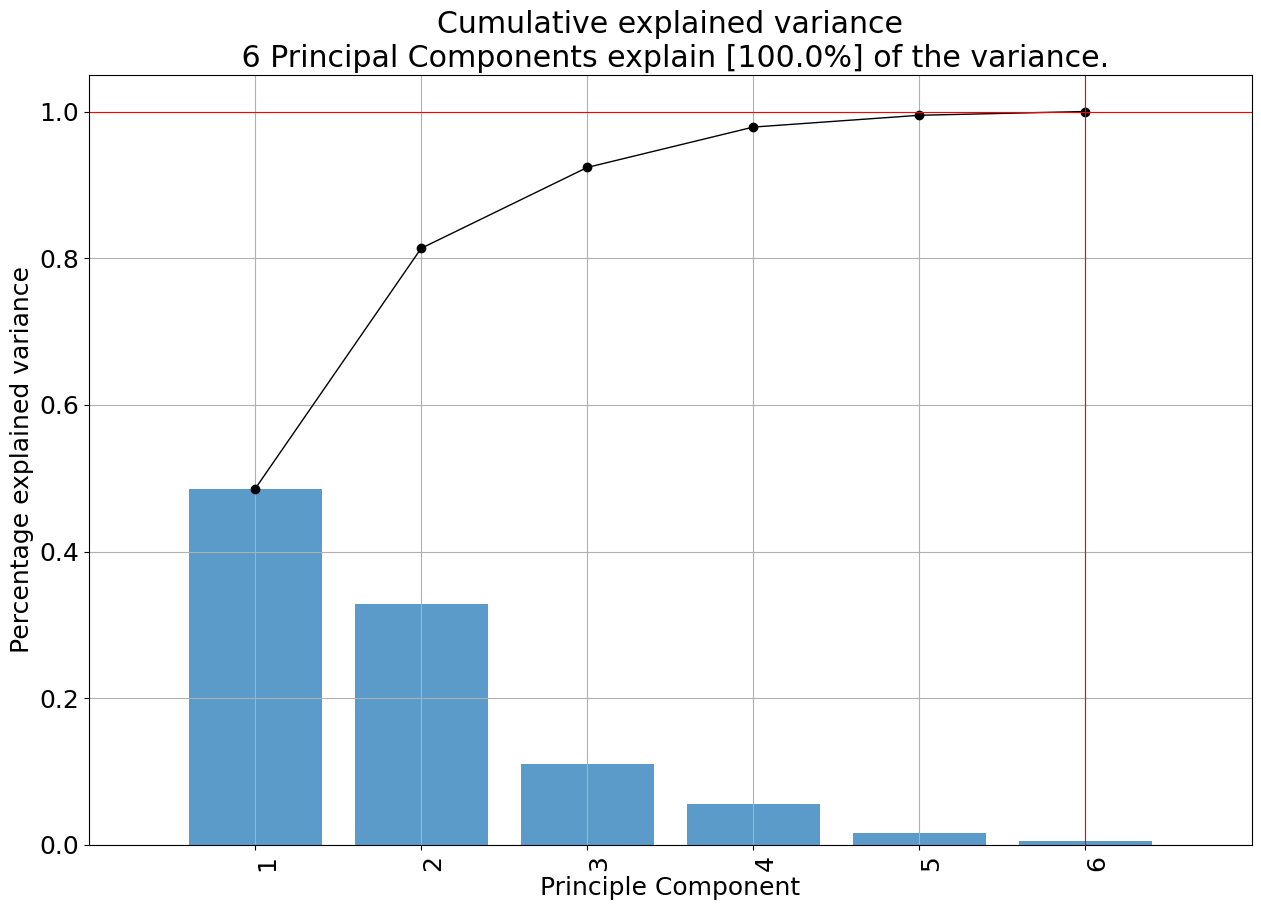

In [68]:
# Make plot
fig, ax = model_depurada.plot()

Podemos evidenciar que ambos métodos llegan a la misma conclusión: 1) por una parte, el criterio de Kaiser sugiere tomar dos componentes principales, y 2) en el método gráfico se evidencia que se logra una varianza explicada acumulada superior al 80% a partir del segundo componente principal. Por lo que tomaremos los dos primeros componentes principales para la elaboración de nuestro indicador.

Ahora bien, el primer componente principal estará compuesto por el eigenvector correspondiente al eigenvalor más alto. Así las cosas, seleccionaremos para el primer componente principal el eigenvector del eigenvalor = 2.9126723.

In [69]:
eig_vec_depurada=eig_vec_depurada.T
eig_vec_depurada[[0]]

array([[ 0.03900923, -0.01705583,  0.55496264,  0.34796262, -0.54391058,
        -0.52276873]])

Por lo tanto, el primer componente principal es:

\begin{align}
f_1 =  0.039 \times Área + -0.017 \times Licencias + 0.554 \times IPC + 0.347 \times Importaciones + -0.543 \times ICC + -0.522 \times IPC
\end{align}

Calculando este componente para cada una de las observaciones tenemos entonces un índice que reduce las seis variables en una:

In [70]:
f1_depurada=Z_depurada.dot(eig_vec_depurada[[0]].T) #calculamos f1
f1_depurada.columns = ['CP1'] #nombramos la columna del primer componente como CP1
f1_depurada.head()

CP1
Fecha             
2005-01-01 -2.4382
2005-02-01 -2.0384
2005-03-01 -1.6641
2005-04-01 -1.8558
2005-05-01 -1.8069

Podemos observar que este componente está recogiendo los valores macroeconómicos provenientes de la demanda, puesto que los mayores loadings se han asignado a las variables: IPC, importaciones, ICC e IEC. Estas recogen la fortaleza relativa de la demanda interna con el fin de identificar puntos de inflexión en la actividad económica. 

Continuando con el ejemplo anterior, el segundo componente principal es aquel que está asociado al segundo eigenvalue mayor, que es 1.96797888. 

In [76]:
eig_vec_depurada=eig_vec_depurada.T
eig_vec_depurada[[1]]

array([[0.63932539, 0.57710995, 0.05946015, 0.43089454, 0.19605177,
        0.17482917]])

Por lo tanto, el segundo componente principal es:

\begin{align}
f_2 =  0.639 \times Área + 0.557 \times Licencias + 0.059 \times IPC + 0.430 \times Importaciones + 0.196 \times ICC + 0.174 \times IPC
\end{align}

Calculando este componente para cada una de las observaciones tenemos entonces un índice que reduce las seis variables en una:

In [72]:
f2_depurada=Z_depurada.dot(eig_vec_depurada[[1]].T) #calculamos f1
f2_depurada.columns = ['CP2'] #nombramos la columna del primer componente como CP1
f2_depurada.head()

CP2
Fecha             
2005-01-01 -3.0543
2005-02-01 -2.4876
2005-03-01 -2.3497
2005-04-01 -1.8843
2005-05-01 -2.2128

Así mismo, observamos que el segundo componente está recogiendo los efectos macroeconómicos provenientes de la oferta, puesto que las variables Área aprobada y Número de licencias tienen los mayores loadings y están correlacionados con qué tan fuerte será el sector construcción al momento de ofrecer proyectos de vivienda. Así mismo, la variable importaciones tiene un peso importante ya que muchos de los materiales del sector edificador son importados y continúa reflejando los estímulos que tiene la oferta sobre la actividad económica.

Así, para concluir el análisis de los componentes, podemos evidenciar que el primer componente principal recoge los choques de demanda y el segundo los de oferta a la hora de construir nuestro índice adelantado de actividad económica colombiana.

## Cálculo del índice:
En este paso, con base en la metodología del Banco de la República en el paper "Financial Conditions Index: Early and Leading Indicator for Colombia?∗", calcularemos el CLI a partir de un promedio ponderado entre cada componente y el porcentaje de varianza explicada que aporta dicho componente en la matriz de componentes principales.

In [77]:
df_2_cp = pd.concat([f1_depurada, f2_depurada], axis=1)
df_2_cp

CP1     CP2
Fecha                     
2005-01-01 -2.4382 -3.0543
2005-02-01 -2.0384 -2.4876
2005-03-01 -1.6641 -2.3497
2005-04-01 -1.8558 -1.8843
2005-05-01 -1.8069 -2.2128
...            ...     ...
2023-02-01  3.4557  1.4091
2023-03-01  3.6798  2.1386
2023-04-01  3.5373  0.6206
2023-05-01  3.3851  1.2694
2023-06-01  2.8108  1.2288

[222 rows x 2 columns]

In [78]:
contribucion_varianza_x_componente_depurada = np.array([[model_depurada.results['variance_ratio'][0]]*222,[model_depurada.results['variance_ratio'][1]]*222])
contribucion_varianza_x_componente_depurada = contribucion_varianza_x_componente_depurada.T
contribucion_varianza_x_componente_depurada = pd.DataFrame(contribucion_varianza_x_componente_depurada, columns=['WPC1','WPC2'])
contribucion_varianza_x_componente_depurada

WPC1   WPC2
0   0.4854 0.3280
1   0.4854 0.3280
2   0.4854 0.3280
3   0.4854 0.3280
4   0.4854 0.3280
..     ...    ...
217 0.4854 0.3280
218 0.4854 0.3280
219 0.4854 0.3280
220 0.4854 0.3280
221 0.4854 0.3280

[222 rows x 2 columns]

In [79]:
# Realizar la suma producto
CLI_2 = pd.DataFrame(np.sum(df_2_cp.values * contribucion_varianza_x_componente_depurada.values, axis=1), columns=['CLI'])
CLI_2.index = df_2_cp.index
# Mostrar el DataFrame resultante
CLI_2

CLI
Fecha             
2005-01-01 -2.1854
2005-02-01 -1.8055
2005-03-01 -1.5785
2005-04-01 -1.5189
2005-05-01 -1.6029
...            ...
2023-02-01  2.1397
2023-03-01  2.4878
2023-04-01  1.9207
2023-05-01  2.0596
2023-06-01  1.7675

[222 rows x 1 columns]

Graficamos la serie del CLI:

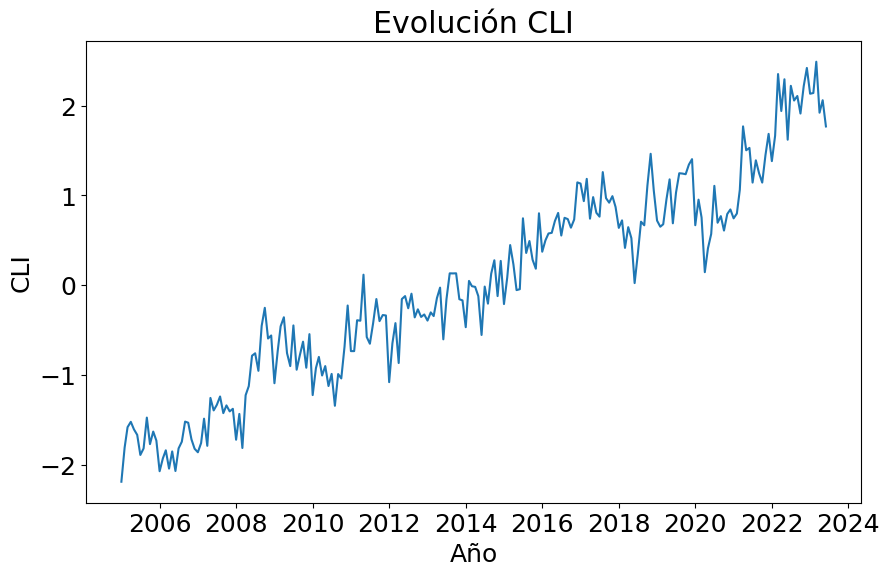

In [80]:
# Asegurarse de que el índice es de tipo datetime
CLI_2.index = pd.to_datetime(CLI_2.index)

# Crear la gráfica de línea
plt.figure(figsize=(10,6))
plt.plot(CLI_2)
plt.xlabel('Año')
plt.ylabel('CLI')
plt.title('Evolución CLI')
plt.show()

## Proporción de Varianza Explicada

In [81]:
eig_val_depurada/sum(eig_val_depurada)

array([0.48544538, 0.32799648, 0.11030411, 0.05503017, 0.01609259,
       0.00513126])

Podemos ver entonces que en este ejemplo:

- El primer componente principal explica el 48,5% del total de la varianza.

- El segundo componente principal explica el 32.7% del total de la varianza.

- El tercer componente principal explica el 11.0% del total de la varianza.

- Entre el cuarto, quinto y sexto componente se explica el 8% restante.

## Escenarios de choque con China

Ahora realizaremos los ejercicios de elasticidad entre el índice de China y el CLI calculado para Colombia con el fin de estimar el efecto de una variación de una unidad en el índice de China en el CLI Colombiano. 

Importamos el índice de China:

In [82]:
df_elasticidad_depurada = pd.concat([CLI_2, China], axis=1)
df_elasticidad_depurada

CLI  Índice China
Fecha                           
2005-01-01 -2.1854       74.9345
2005-02-01 -1.8055       76.2834
2005-03-01 -1.5785       75.5968
2005-04-01 -1.5189       75.3700
2005-05-01 -1.6029       75.2193
...            ...           ...
2023-02-01  2.1397      115.4502
2023-03-01  2.4878      115.1156
2023-04-01  1.9207      114.8925
2023-05-01  2.0596      114.7809
2023-06-01  1.7675      114.5578

[222 rows x 2 columns]

In [83]:
import statsmodels.api as sm
# Definir las variables endógena y exógena
X_exo_2 = df_elasticidad_depurada['Índice China']  # Variable exógena
y_2 = df_elasticidad_depurada['CLI']  # Variable endógena

# Añadir una constante a la variable exógena
X_exo_2 = sm.add_constant(X_exo_2)

# Crear un modelo de regresión lineal ordinaria (OLS)
model_regresion_2 = sm.OLS(y_2, X_exo_2)

# Ajustar el modelo
results_regresion_2 = model_regresion_2.fit()

# Imprimir los resultados
print(results_regresion_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLI   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2023.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          6.75e-113
Time:                        21:52:46   Log-Likelihood:                -85.512
No. Observations:                 222   AIC:                             175.0
Df Residuals:                     220   BIC:                             181.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.3903      0.188    -44.610   

Observamos que el índice de China explica un 90% la variabilidad del índice colombiano a través del R2 ajustado. Ante un aumento de 1 unidad en el índice de China, el índice de Colombia aumenta 0.0869.